In [2]:
import pandas as pd
import helper as analytics
import numpy as np
import matplotlib.pyplot as plt

In [3]:
prompt_order = [
    "domain-complex-force (Product)",
    "domain-complex-free (Product)",
    "domain-simple-force (Product)",
    "domain-simple-free (Product)",
    "general-complex-force",
    "general-complex-free",
    "general-simple-force",
    "general-simple-free",
    "Narayan-complex",
    "Narayan-simple",
]

In [4]:
baseline_7b_paths = ["../results/baseline/abt-buy/2024-03-08 02:32:43.321314_7b_all.json",
                    "../results/baseline/amazon-google/2024-03-06 16:48:59.218997_7b_all.json",
                    "../results/baseline/wdc/2024-02-18_7b_all.json"]
baseline_7b_stats = analytics.calculate_baseline_stats(baseline_7b_paths)

/Users/aaronsteiner/Documents/GitHub/master-thesis/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# WDC

In [5]:
df = pd.read_pickle("../data/abt-buy/abt-buy-sampled_gs.pkl")
# rename columns name_left to title_left
df.rename(columns={"name_left": "title_left"}, inplace=True)
df.rename(columns={"name_right": "title_right"}, inplace=True)
df.to_pickle("../data/abt-buy/abt-buy-sampled_gs.pkl")

In [6]:
wdc_dataset = pd.read_pickle('../data/wdc/preprocessed_wdcproducts80cc20rnd000unsampled250_2_gs_testset_ralph.pkl')

# First fintune

In [1]:
df = pd.read_json("../results/first_benchmark_Llama-2-7b-chat-hf/2024-03-01 14:06:51.061194_7b_domain_10000.json")
df.loc[df['chatbot_response_clean'] == -1, 'chatbot_response_clean'] =0
analytics.draw_dataset_distrobution(df, wdc_dataset)
analytics.draw_scores(df, prompt_order)

NameError: name 'pd' is not defined

In [8]:
df

,task,chatbot_question,chatbot_response_raw,chatbot_response_clean,id_left,brand_left,title_left,description_left,price_left,priceCurrency_left,...,brand_right,title_right,description_right,price_right,priceCurrency_right,specTableContent_right,cluster_id_right,pair_id,label,is_hard_negative
0,domain-complex-free (Product),Do the two product descriptions refer to the s...,No. attribute=brand|||importance=,0,67017951,None,Ubiquiti UniFi Protect Video Security,Ubiquiti's UniFi Protect offers all the flexib...,None,None,...,None,Ubiquiti UniFi Video G3 Infrared Range Extender,The IR Range Extender is a 'Plug and Play' acc...,70.80,GBP,NaN,711907,67017951#5303451,0,True
1,domain-complex-free (Product),Do the two product descriptions refer to the s...,No. attribute=brand|||importance=,0,41364196,None,Kšiltovka New Era Clean Trucker Chicago Bulls,None,658,CZK,...,None,Kšiltovka New Era New York Yankees MLB 9Fifty,None,810,CZK,NaN,76491423,41364196#29165749,0,True
2,domain-complex-free (Product),Do the two product descriptions refer to the s...,Yes. attribute=brand|||importance,1,49744056,None,DYMO D1 - Glossy tape - black on white - Roll ...,Dymo 2000/5500 Tape 19mmx7m Black/White 45803.,13.49,GBP,...,DYMO,"DYMO 45017 D1 Tape 12mm x 7m sort p rd, S0720570",Originalt DYMO 45017 D1-tape SORT/RD Passer ti...,139.00,DKK,NaN,48435,49744056#66087579,0,True
3,domain-complex-free (Product),Do the two product descriptions refer to the s...,No. attribute=storage capacity|||importance,0,63587638,Samsung,SAMSUNG T7 Touch Black 2TB Portable SSD with F...,"2TB Samsung T7 Touch MU-PC2T0K/WW, Portable Ex...",365.99,GBP,...,None,T7 Portable SSD - 2TB Indigo Blue,"Light and pocket-sized, the Portable SSD T7 bo...",639.99,NZD,NaN,1252792,63587638#52588862,0,True
4,domain-complex-free (Product),Do the two product descriptions refer to the s...,No. attribute=brand|||importance=,0,25138178,None,Kingston Canvas 128GB Micro SDXC C10 U1 V10 A1,None,39.95,USD,...,None,Transcend SSD230S 128GB best price,"Transcend 128GB 2.5\"" SSD230S SATA3 3D NAND Fl...",2.208E1,eur,NaN,715391,25138178#45664586,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4951,domain-simple-force (Product),Do the two product descriptions match? Answer ...,Yes. attribute=brand|||importance=,1,16319132,None,Sigma 35mm f/1.4 DG HSM Art Lens Canon,67mm Filter Size f/1.4 Aperture N/A Stabilized...,699.00,USD,...,None,SIGMA35mm/1.4 DG HSM | ART [Canon EF-mount]E67...,None,None,None,NaN,704991,16319132#54637257,1,False
4952,domain-simple-force (Product),Do the two product descriptions match? Answer ...,Yes. attribute=brand|||importance=,1,91699237,None,CM / CoolerMaster MasterCase H500 ARGB ATX Cas...,Warranty : N/A,159.00,SGD,...,None,Cooler Master Mastercase H500 ARGB Midi Tower ...,None,"114,95",EUR,NaN,1473407,91699237#13684723,1,False
4953,domain-simple-force (Product),Do the two product descriptions match? Answer ...,Yes. 💯 attribute=brand,1,69931309,None,Corsair DDR4 8GB 2133Mhz CL15 Dimm Valueselect...,"Corsair Value Select 8GB PC4-17000, 8 GB, DDR4...",29.1,EUR,...,Corsair,CORSAIR DDR4 2133MHZ 8GB 1x288 DIMM 1.20V Unbu...,None,32.15,EUR,NaN,2861749,69931309#38788118,1,False
4954,domain-simple-force (Product),Do the two product descriptions match? Answer ...,Yes. attribute=brand|||importance=,1,92956854,Cooler Master,Cooler Master MasterBox Lite 5 ATX Case Window...,"Motherboard compatibility :ATX, Micro-ATX, Min...",85.0,AUD,...,None,CM Case MasterBox Lite 5,CM Case MasterBox Lite 5 Kucista,144.00,BAM,NaN,1006147,92956854#42906184,1,False


In [9]:
df.groupby('task')['chatbot_response_clean'].value_counts()


task                            chatbot_response_clean
domain-complex-force (Product)  0                         648
                                1                         591
domain-complex-free (Product)   0                         860
                                1                         379
domain-simple-force (Product)   0                         754
                                1                         485
domain-simple-free (Product)    0                         941
                                1                         298
Name: count, dtype: int64

In [10]:
df["chatbot_response_raw"][4953]

'Yes. 💯 attribute=brand'

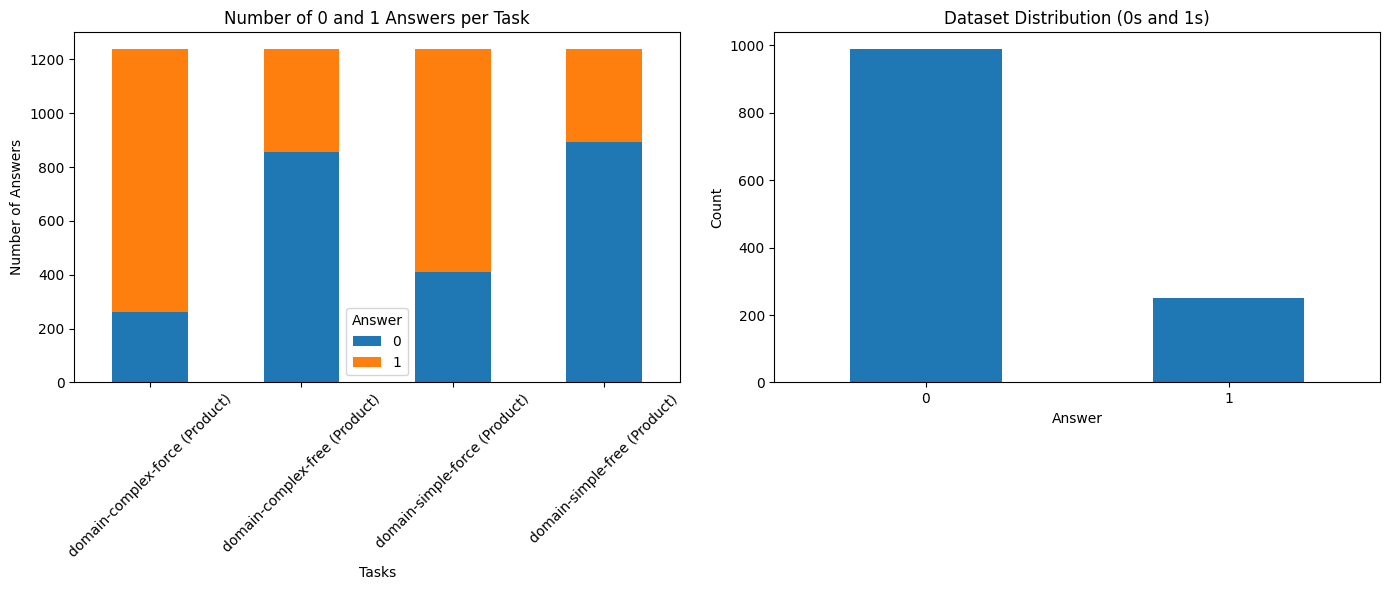

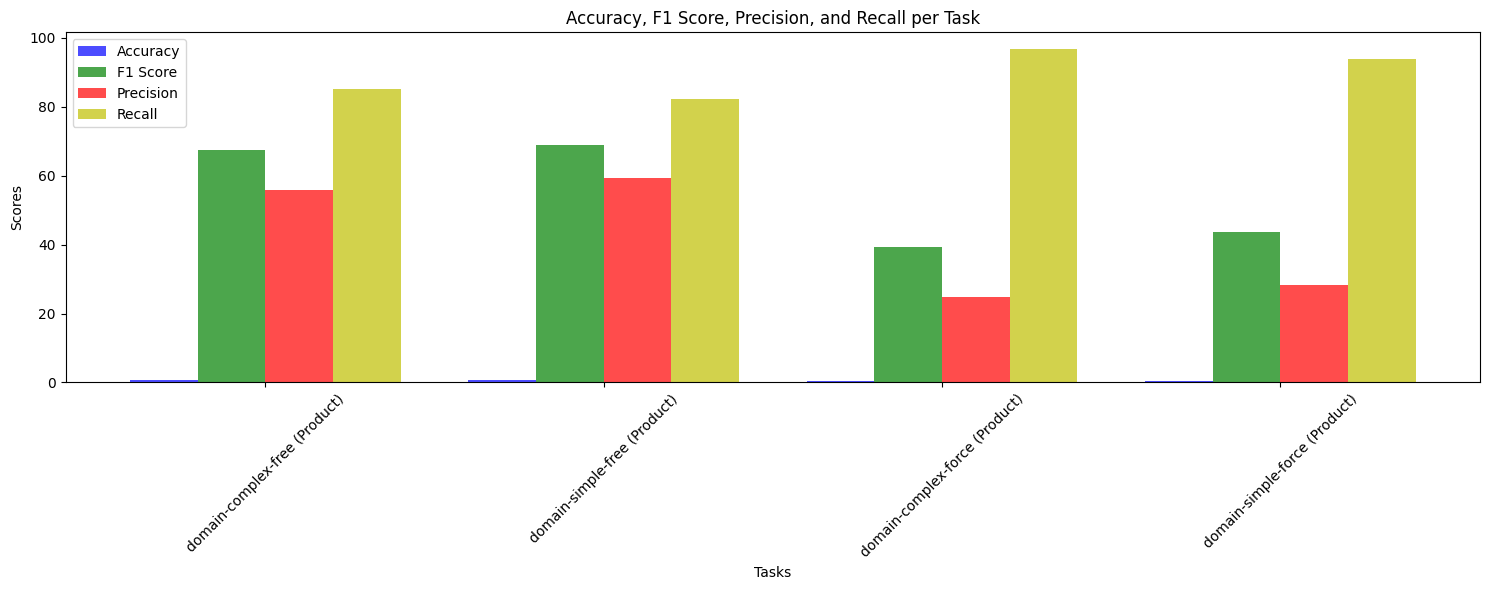

                             Task  Accuracy  F1 Score  Precision  Recall  \
0   domain-complex-free (Product)  0.834544     67.51      55.91    85.2   
1    domain-simple-free (Product)  0.850686     69.01      59.37    82.4   
2  domain-complex-force (Product)  0.399516     39.41      24.74    96.8   
3   domain-simple-force (Product)  0.509282     43.60      28.38    94.0   

   Num -1 Responses  
0                 0  
1                 0  
2                 0  
3                 0  
Mean of the scores:
F1 Score    54.8825
dtype: float64

Standard Deviation of the scores:
F1 Score    15.553489
dtype: float64


In [11]:
df = pd.read_json("../results/first_benchmark_Llama-2-7b-chat-hf/2024-03-02 17:00:53.856013_7b_domain.json")
df.loc[df['chatbot_response_clean'] == -1, 'chatbot_response_clean'] =0
analytics.draw_dataset_distrobution(df, wdc_dataset)
analytics.draw_scores(df)

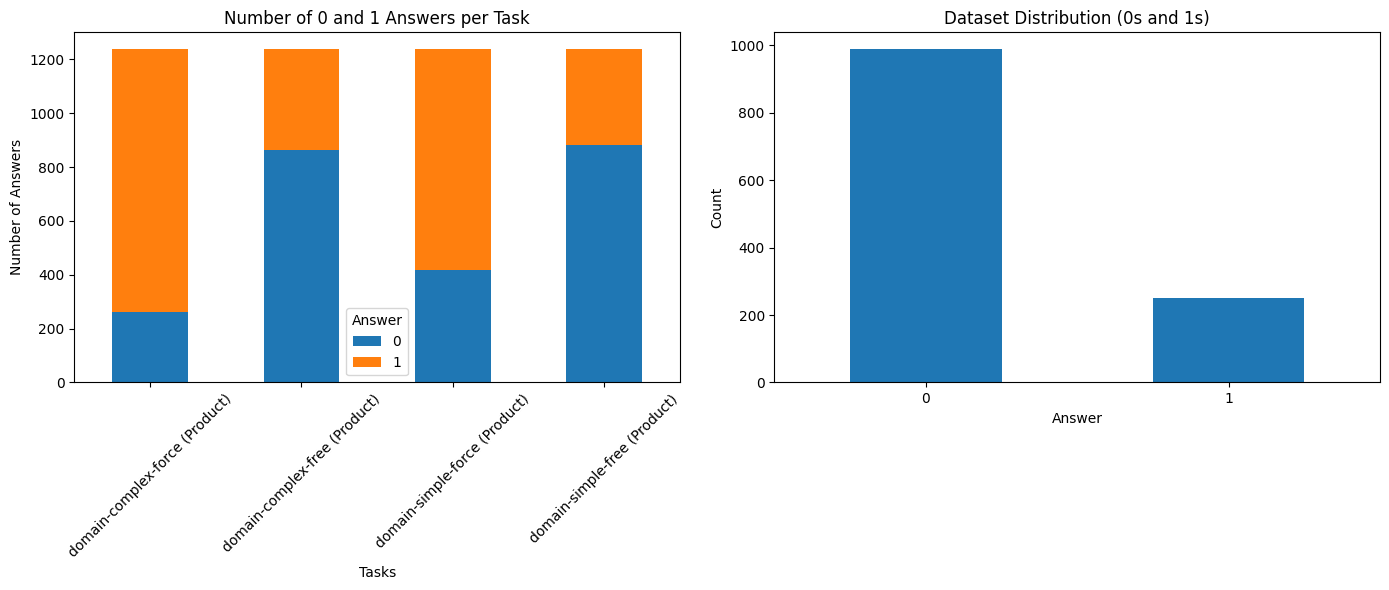

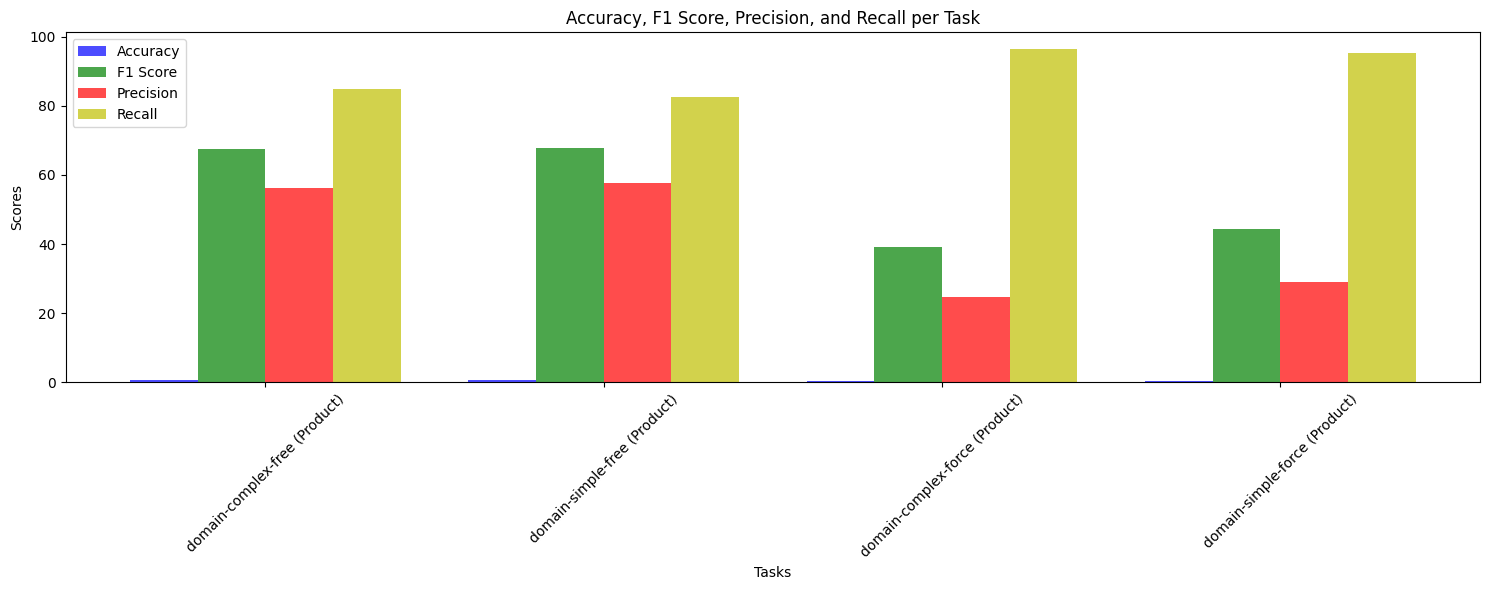

                             Task  Accuracy  F1 Score  Precision  Recall  \
0   domain-complex-free (Product)  0.836158     67.62      56.23    84.8   
1    domain-simple-free (Product)  0.842615     67.87      57.70    82.4   
2  domain-complex-force (Product)  0.397094     39.22      24.62    96.4   
3   domain-simple-force (Product)  0.518160     44.36      28.92    95.2   

   Num -1 Responses  
0                 0  
1                 0  
2                 0  
3                 0  
Mean of the scores:
F1 Score    54.7675
dtype: float64

Standard Deviation of the scores:
F1 Score    15.131678
dtype: float64


In [12]:
df_7b_10k = pd.read_json("../results/7b/10_000/2024-03-06-20-53-13_7b_domain_20k.json")
df_7b_10k.loc[df_7b_10k['chatbot_response_clean'] == -1, 'chatbot_response_clean'] =0
analytics.draw_dataset_distrobution(df_7b_10k, wdc_dataset)
analytics.draw_scores(df_7b_10k)

# 13B

## Comparing Checkpoints 5.000 and 20.000 with 10k training examples


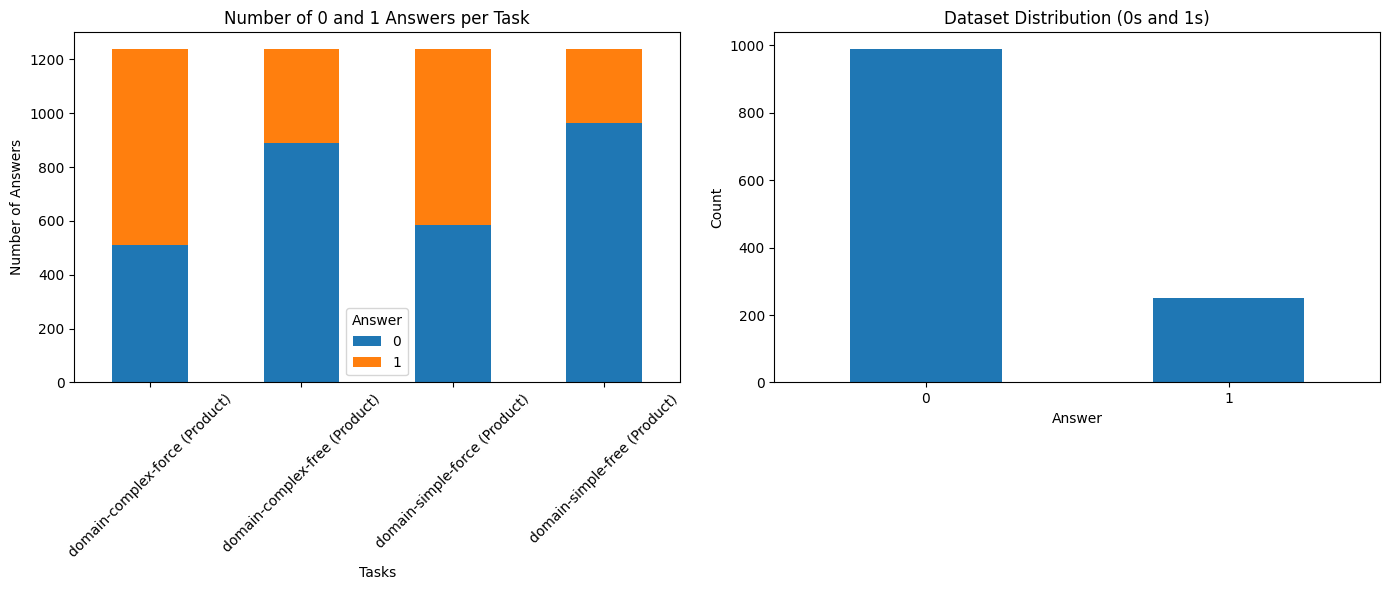

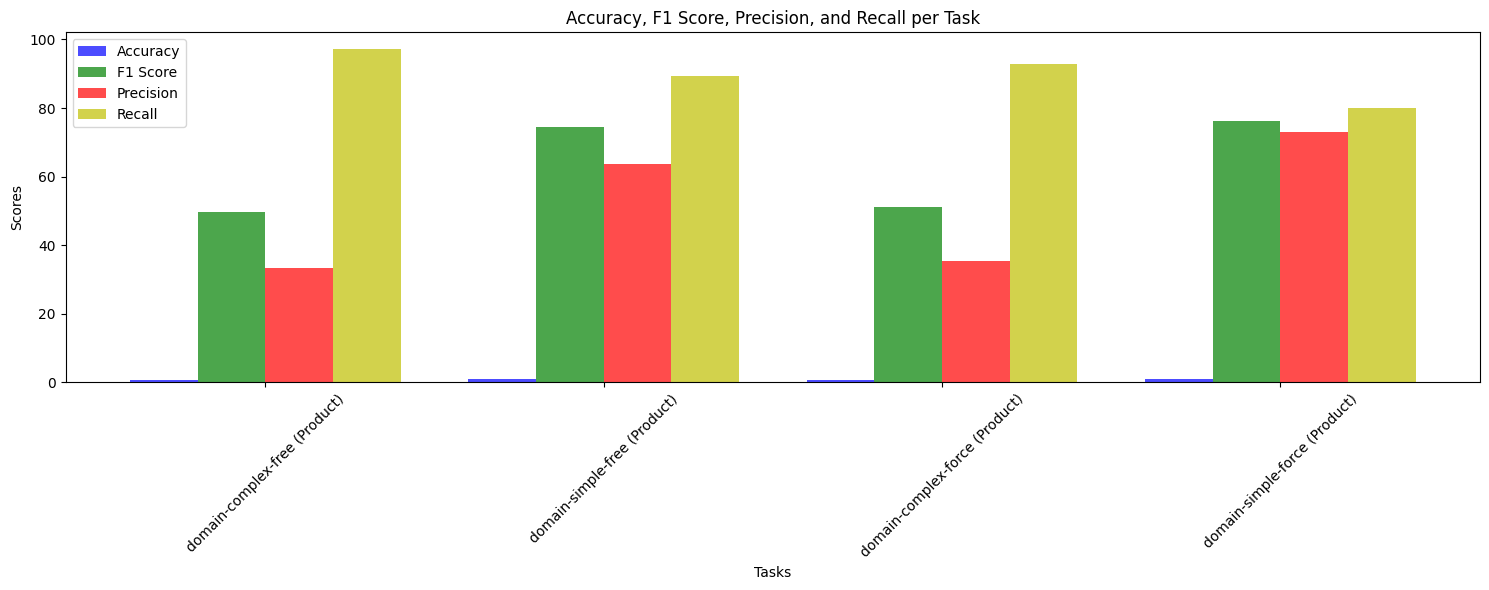

                             Task  Accuracy  F1 Score  Precision  Recall  \
2  domain-complex-force (Product)  0.602098     49.64      33.33    97.2   
0   domain-complex-free (Product)  0.875706     74.33      63.71    89.2   
3   domain-simple-force (Product)  0.644068     51.27      35.42    92.8   
1    domain-simple-free (Product)  0.899919     76.34      72.99    80.0   

   Num -1 Responses  
2                 0  
0                 0  
3                 0  
1                 0  
Mean of the scores:
F1 Score    62.895
dtype: float64

Standard Deviation of the scores:
F1 Score    14.403274
dtype: float64


In [13]:
df_wdc_13b_10k_checkpoint_5k = pd.read_json("../results/13b/10_000/2024-03-06-02-08-07/2024-03-08-04-27-03_13b_domain_5k.json")
analytics.draw_dataset_distrobution(df_wdc_13b_10k_checkpoint_5k, wdc_dataset)
analytics.draw_scores(df_wdc_13b_10k_checkpoint_5k, prompt_order)

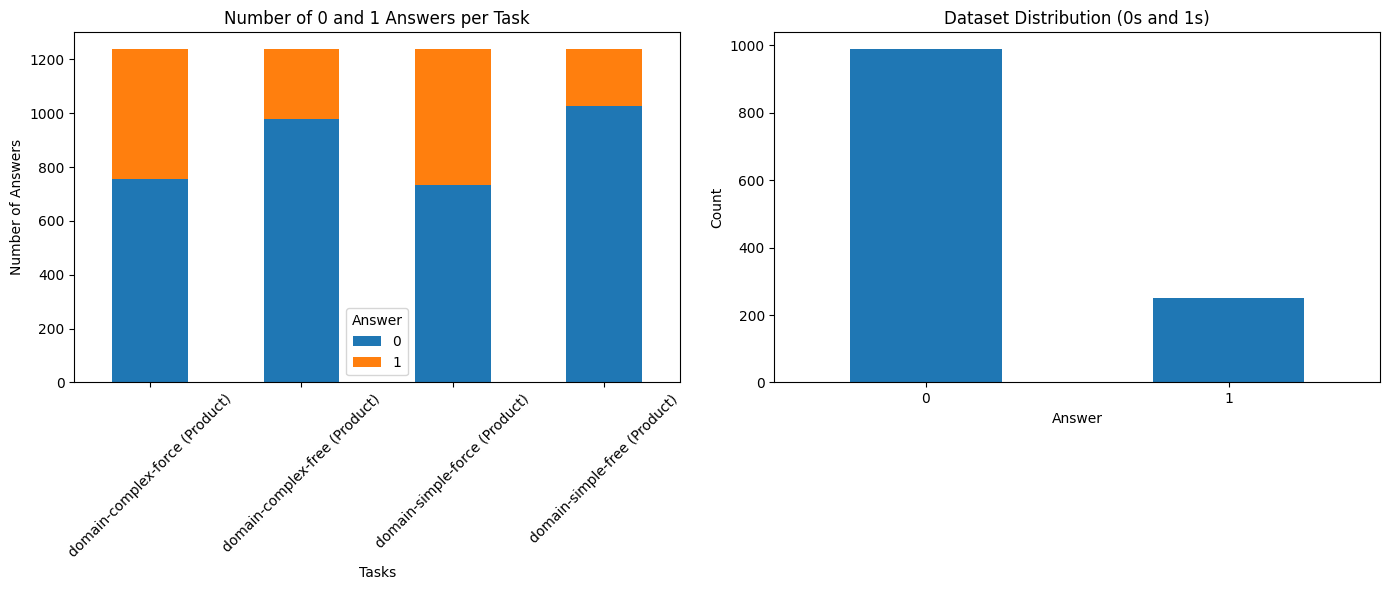

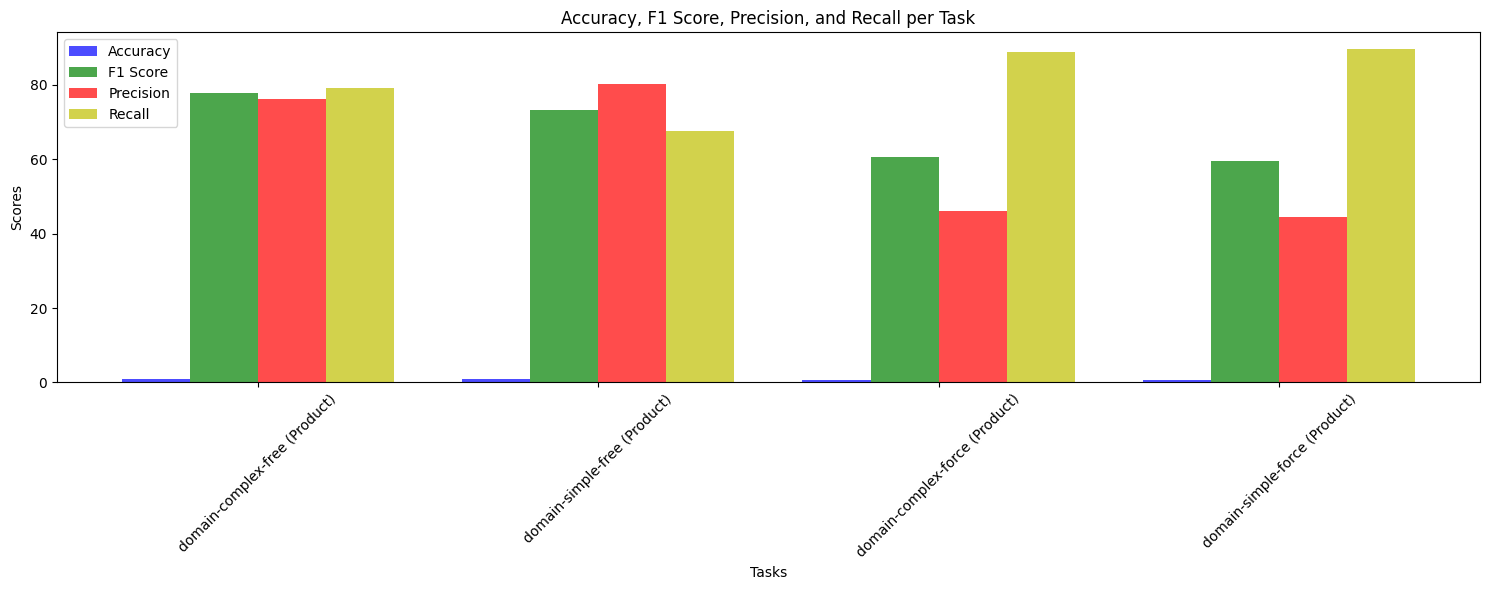

                             Task  Accuracy  F1 Score  Precision  Recall  \
0   domain-complex-free (Product)  0.907990     77.65      76.15    79.2   
1    domain-simple-free (Product)  0.900726     73.32      80.09    67.6   
2  domain-complex-force (Product)  0.767554     60.66      46.06    88.8   
3   domain-simple-force (Product)  0.753027     59.42      44.44    89.6   

   Num -1 Responses  
0                 0  
1                 0  
2                 0  
3                 0  
Mean of the scores:
F1 Score    67.7625
dtype: float64

Standard Deviation of the scores:
F1 Score    9.104784
dtype: float64


In [14]:
df_wdc_13b_10k_checkpoint_20k = pd.read_json("../results/13b/10_000/2024-03-06-02-08-07/2024-03-07-22-05-48_13b_domain_20k.json")
analytics.draw_dataset_distrobution(df_wdc_13b_10k_checkpoint_20k, wdc_dataset)
analytics.draw_scores(df_wdc_13b_10k_checkpoint_20k)

## 1000 Examples

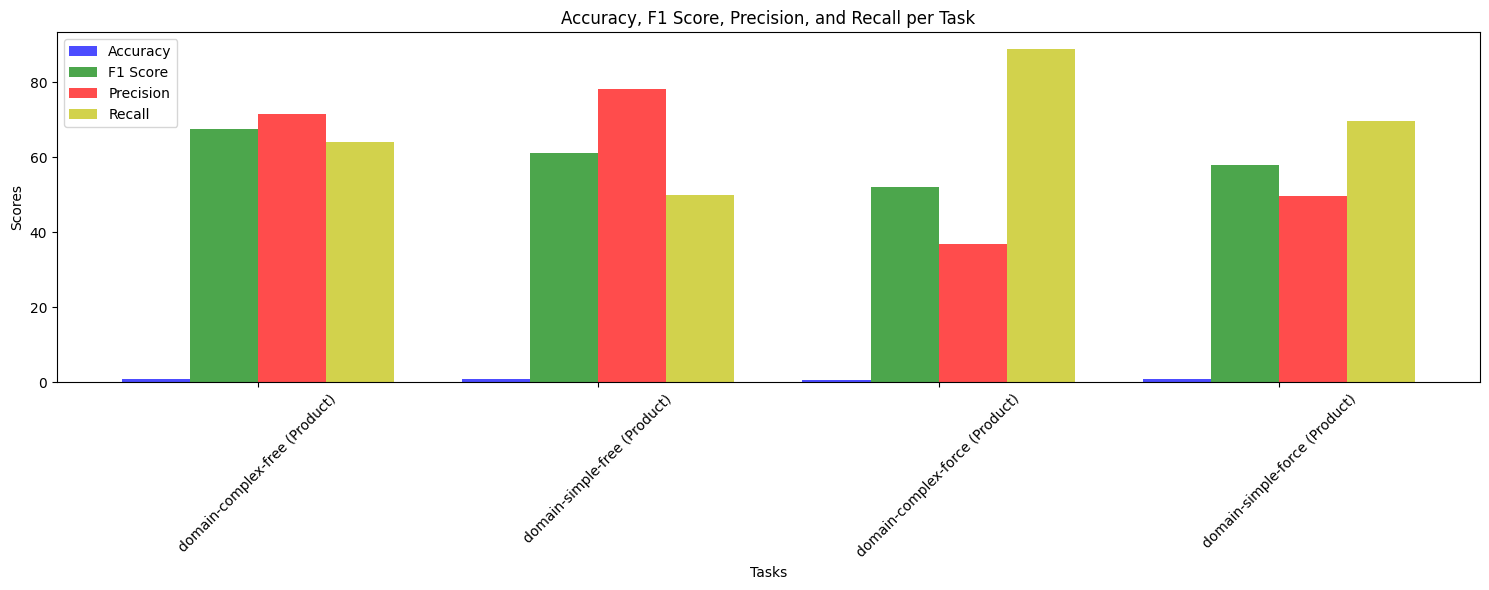

                             Task  Accuracy  F1 Score  Precision  Recall  \
0   domain-complex-free (Product)  0.875706     67.51      71.43    64.0   
1    domain-simple-free (Product)  0.870864     60.98      78.12    50.0   
2  domain-complex-force (Product)  0.669895     52.05      36.82    88.8   
3   domain-simple-force (Product)  0.795803     57.90      49.57    69.6   

   Num -1 Responses  
0                 0  
1                 0  
2                 0  
3                 0  
Mean of the scores:
F1 Score    59.61
dtype: float64

Standard Deviation of the scores:
F1 Score    6.438545
dtype: float64


In [15]:
df = pd.read_json("../results/13b/1000/2024-03-04 20:18:58.959339_13b_domain.json")
#df.loc[df['chatbot_response_clean'] == -1, 'chatbot_response_clean'] =0
#analytics.draw_dataset_distrobution(df)
analytics.draw_scores(df)

## 10 000 Examples

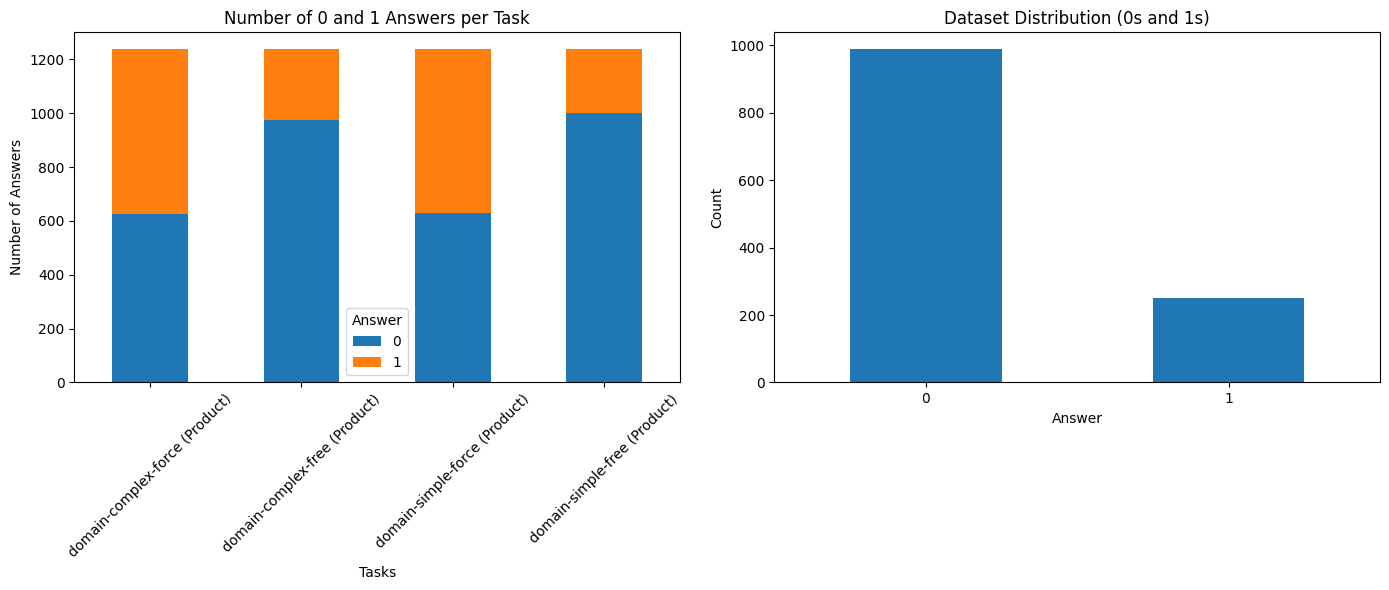

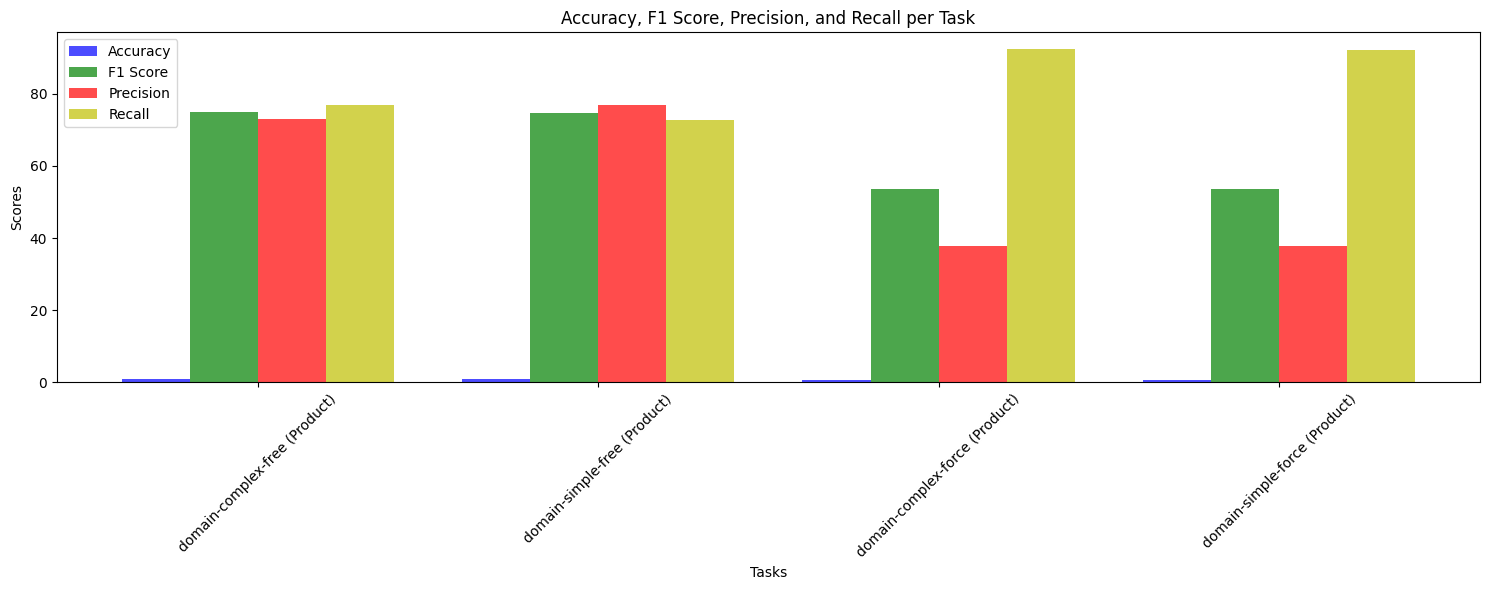

                             Task  Accuracy  F1 Score  Precision  Recall  \
0   domain-complex-free (Product)  0.895884     74.85      73.00    76.8   
1    domain-simple-free (Product)  0.900726     74.74      76.79    72.8   
2  domain-complex-force (Product)  0.677159     53.60      37.75    92.4   
3   domain-simple-force (Product)  0.678773     53.61      37.83    92.0   

   Num -1 Responses  
0                 0  
1                 0  
2                 0  
3                 0  
Mean of the scores:
F1 Score    64.2
dtype: float64

Standard Deviation of the scores:
F1 Score    12.234135
dtype: float64


In [16]:
df_wdc_13k_10k = pd.read_json("../results/lama-13b/10_000/2024-03-04-23-24-20/2024-03-06-04-16-37_13b_domain.json")
analytics.draw_dataset_distrobution(df_wdc_13k_10k, wdc_dataset)
analytics.draw_scores(df_wdc_13k_10k)

## complete

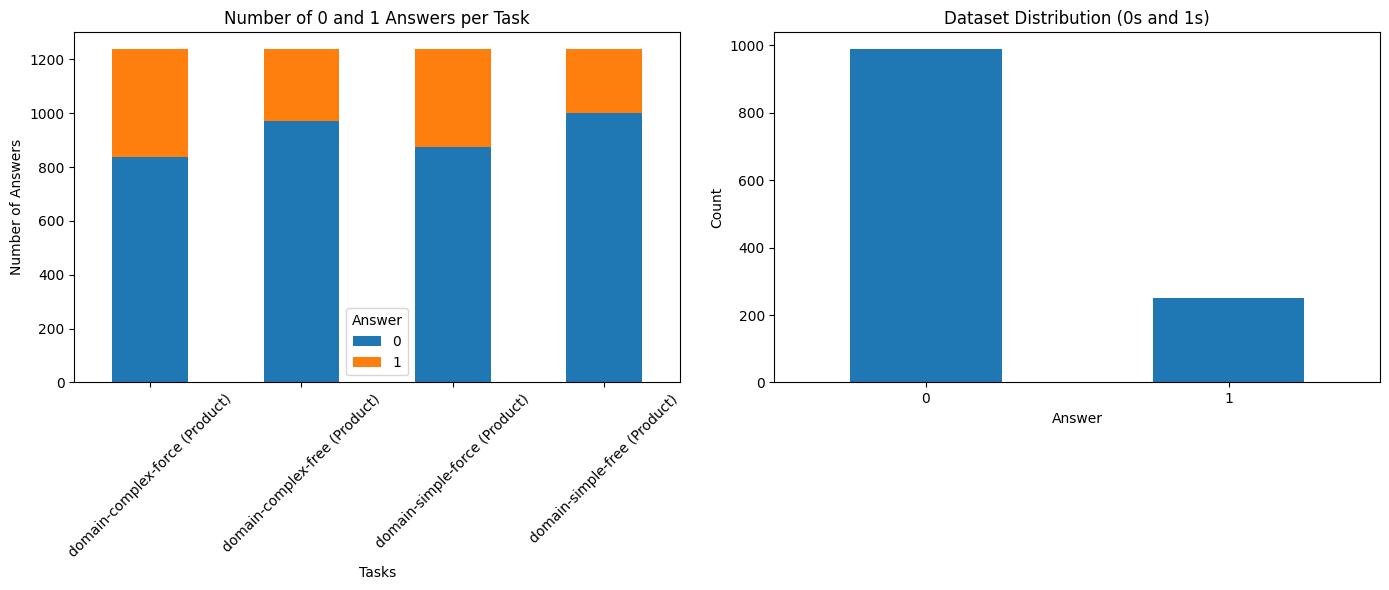

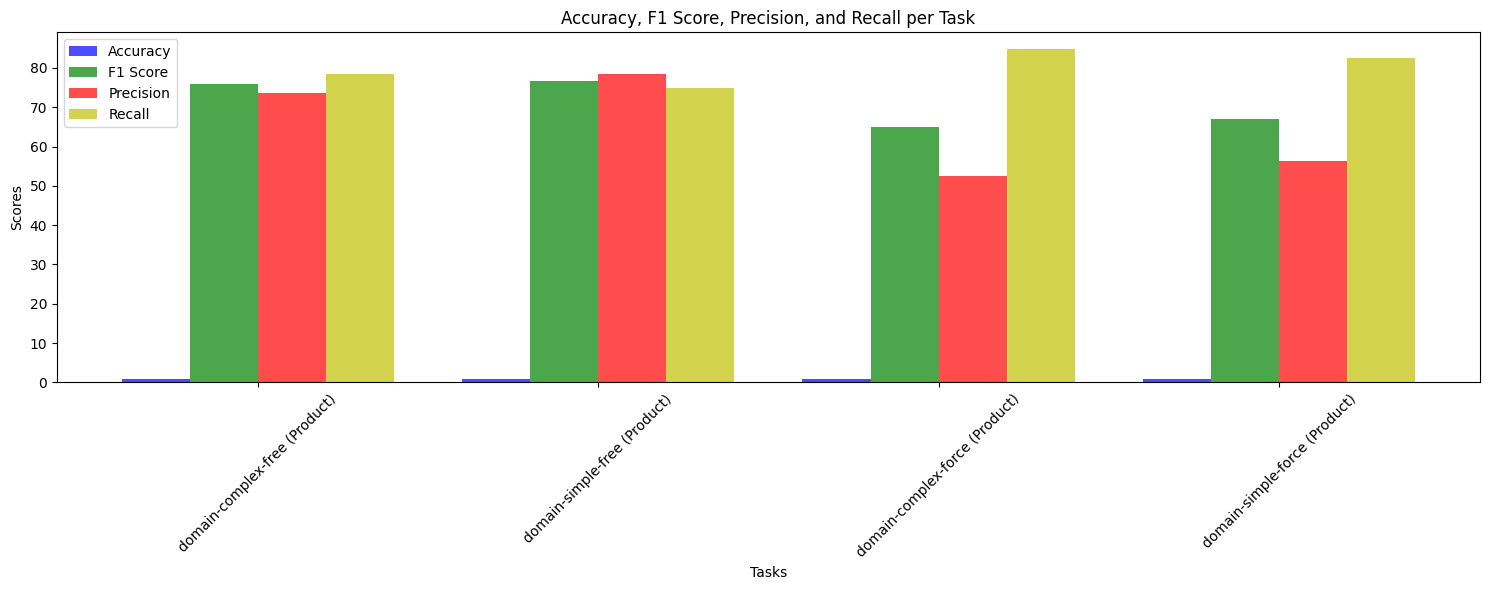

                             Task  Accuracy  F1 Score  Precision  Recall  \
0   domain-complex-free (Product)  0.899919     75.97      73.68    78.4   
1    domain-simple-free (Product)  0.907990     76.64      78.57    74.8   
2  domain-complex-force (Product)  0.815174     64.93      52.61    84.8   
3   domain-simple-force (Product)  0.835351     66.88      56.28    82.4   

   Num -1 Responses  
0                 0  
1                 0  
2                 0  
3                 0  
Mean of the scores:
F1 Score    71.105
dtype: float64

Standard Deviation of the scores:
F1 Score    6.063159
dtype: float64


In [17]:
df = pd.read_json("../results/13b/complete/2024-03-12-20-13-53/results/wdc/2024-03-14-07-04-27_13b_domain_19k.json")
df.loc[df['chatbot_response_clean'] == -1, 'chatbot_response_clean'] =0
analytics.draw_dataset_distrobution(df, wdc_dataset)
analytics.draw_scores(df)

# ABT-Buy

In [18]:
abt_buy_data_set = pd.read_pickle("../data/abt-buy/abt-buy-sampled_gs.pkl")

In [19]:
abt_buy_7b_finetuned = pd.read_json("../results/abt-buy/7b/2024-04-01-14-38-31/results/abt-buy/2024-04-03-15-43-07_7b_domain_5k.json")
abt_buy_13b_finetuned = pd.read_json("../results/abt-buy/13b/2024-04-01-15-58-31/results/abt-buy/2024-04-03-21-08-38_13b_domain_14k.json")
abt_buy_70b_finetuned = pd.read_json("../results/abt-buy/70b/2024-04-04-00-52-25/results/abt-buy/2024-04-06-13-21-27_70b_domain_4k.json")

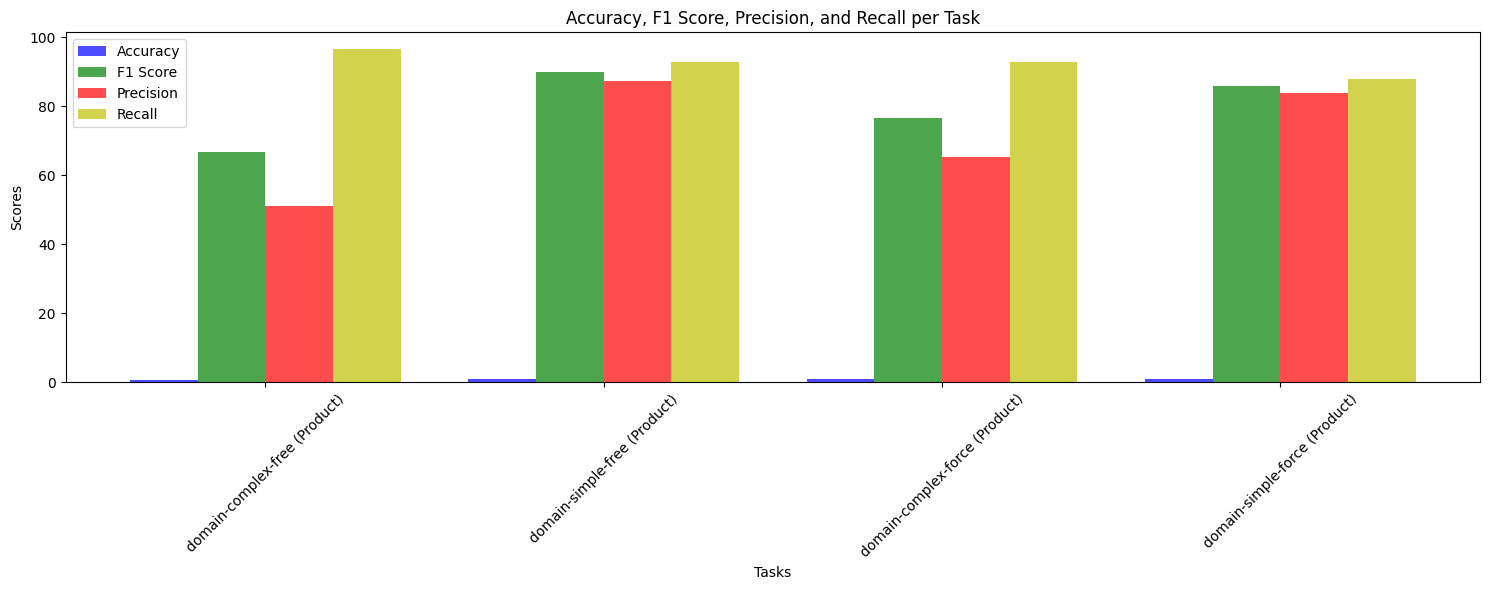

                             Task  Accuracy  F1 Score  Precision  Recall  \
2  domain-complex-force (Product)  0.836650     66.89      51.16   96.60   
0   domain-complex-free (Product)  0.964345     89.88      87.21   92.72   
3   domain-simple-force (Product)  0.903814     76.71      65.41   92.72   
1    domain-simple-free (Product)  0.950249     85.78      83.80   87.86   

   Num -1 Responses  
2                 0  
0                 0  
3                 0  
1                 0  
Mean of the scores:
F1 Score    79.815
dtype: float64

Standard Deviation of the scores:
F1 Score    10.223863
dtype: float64


In [20]:
analytics.draw_scores(abt_buy_7b_finetuned, prompt_order)

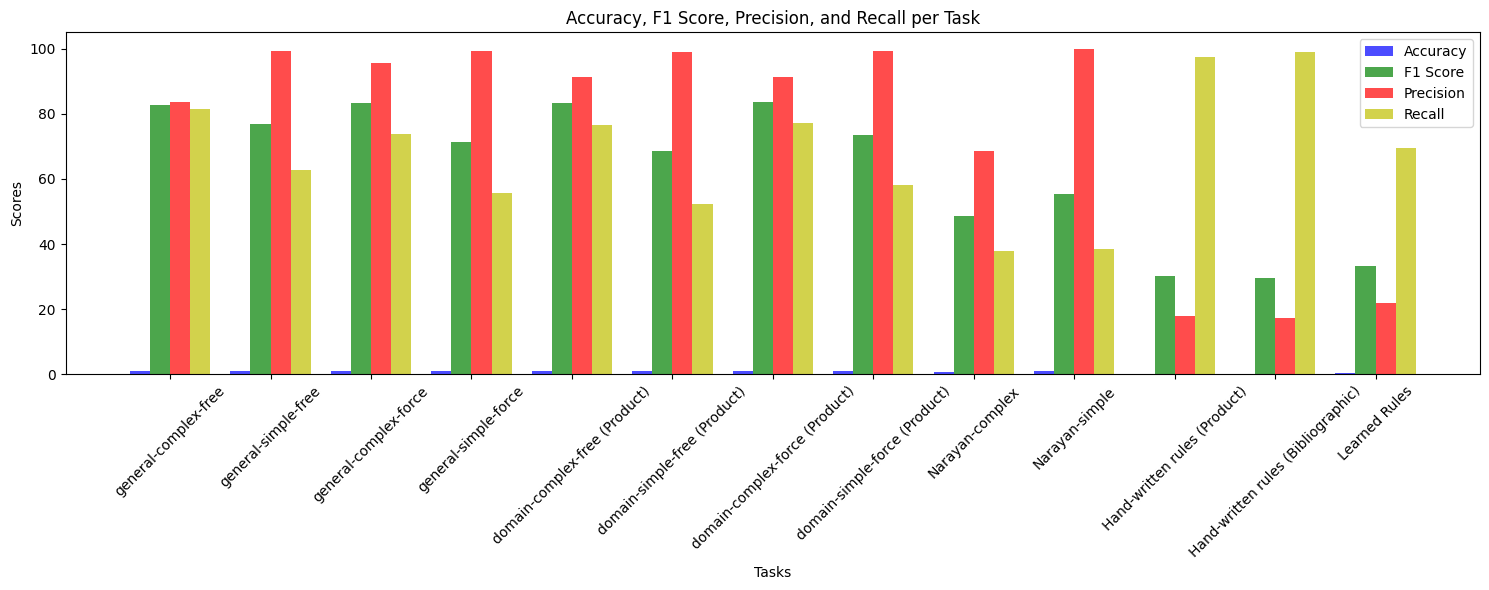

                              Task  Accuracy  F1 Score  Precision  Recall  \
6   domain-complex-force (Product)  0.941128     82.56      83.58   81.55   
4    domain-complex-free (Product)  0.935323     76.79      99.23   62.62   
7    domain-simple-force (Product)  0.949420     83.29      95.60   73.79   
5     domain-simple-free (Product)  0.923715     71.43      99.14   55.83   
2            general-complex-force  0.947761     83.38      91.33   76.70   
0             general-complex-free  0.917910     68.57      99.08   52.43   
3             general-simple-force  0.948590     83.68      91.38   77.18   
1              general-simple-free  0.927861     73.39      99.17   58.25   
8                  Narayan-complex  0.864013     48.75      68.42   37.86   
9                   Narayan-simple  0.894693     55.44     100.00   38.35   
10                             NaN  0.228027     30.16      17.83   97.57   
11                             NaN  0.191542     29.50      17.33   99.03   

In [ ]:
analytics.draw_scores(abt_buy_13b_finetuned, prompt_order)

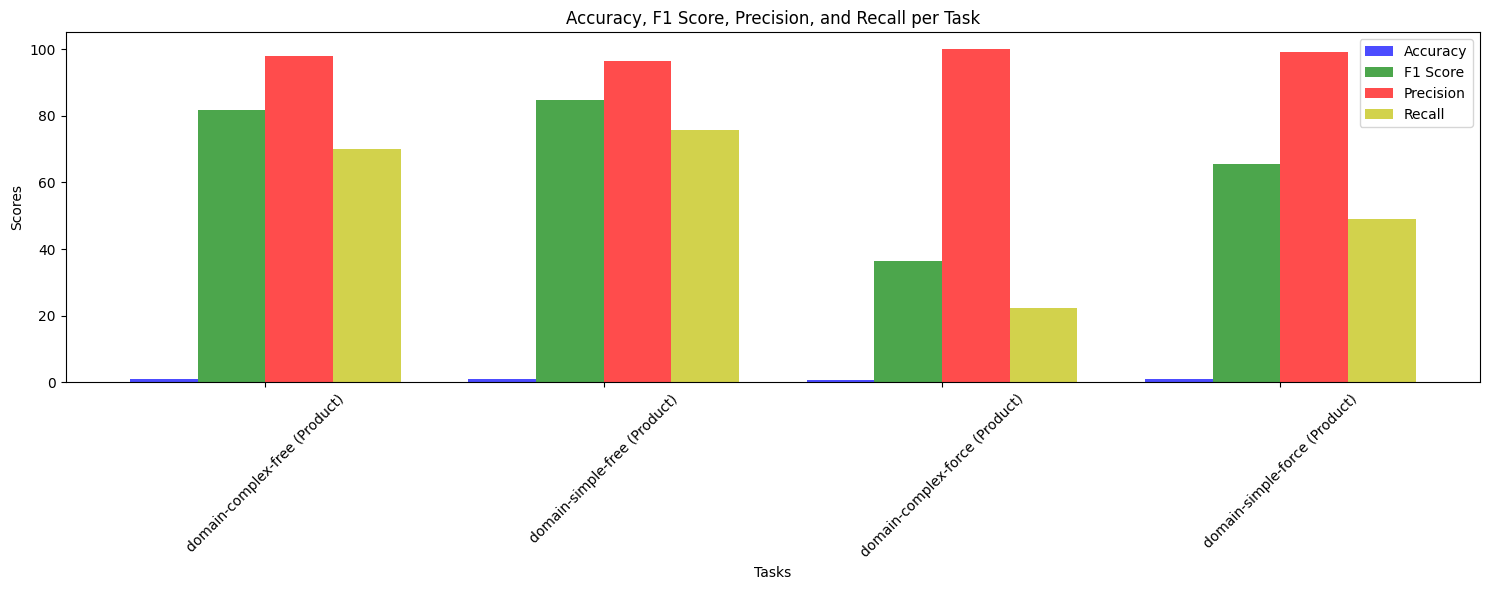

                             Task  Accuracy  F1 Score  Precision  Recall  \
2  domain-complex-force (Product)  0.946103     81.59      97.96   69.90   
0   domain-complex-free (Product)  0.953566     84.78      96.30   75.73   
3   domain-simple-force (Product)  0.867330     36.51     100.00   22.33   
1    domain-simple-free (Product)  0.912106     65.58      99.02   49.03   

   Num -1 Responses  
2                 0  
0                 0  
3                 0  
1                 1  
Mean of the scores:
F1 Score    67.115
dtype: float64

Standard Deviation of the scores:
F1 Score    22.065056
dtype: float64


In [ ]:
analytics.draw_scores(abt_buy_70b_finetuned, prompt_order)

## Amazon-Google

In [ ]:
amazon_google_7b_finetuned = pd.read_json("../results/amazon-google/7b/2024-03-30-13-23-52/results/amazon-google/2024-04-01-08-16-46_7b_domain_8k.json")
amazon_google_13b_finetuned = pd.read_json("../results/amazon-google/13b/2024-04-12-11-29-26/results/amazon-google/2024-04-15-21-00-49_13b_domain_21k.json")
amazon_google_70b_finetuned = pd.read_json("../results/amazon-google/70b/2024-04-01-04-02-58/results/amazon-google/2024-04-03-19-20-15_70b_domain_20k.json")

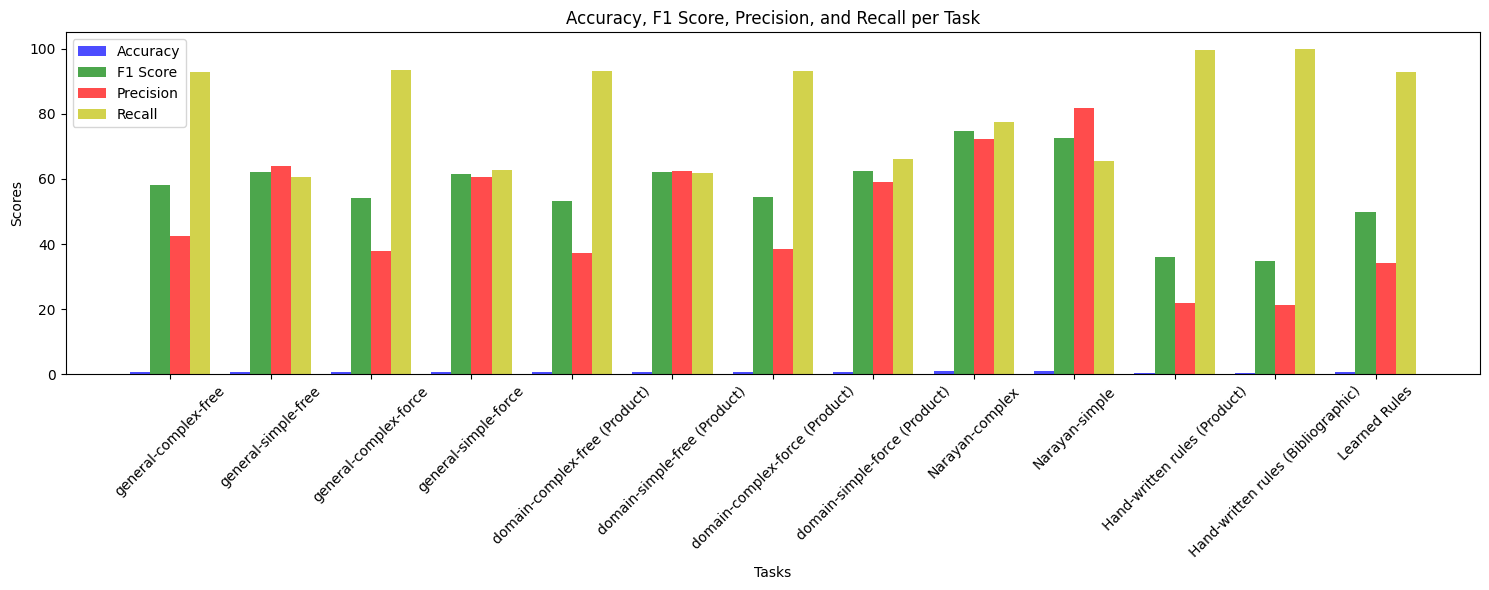

                              Task  Accuracy  F1 Score  Precision  Recall  \
6   domain-complex-force (Product)  0.747974     58.26      42.47   92.74   
4    domain-complex-free (Product)  0.860616     62.28      63.96   60.68   
7    domain-simple-force (Product)  0.697731     54.01      37.95   93.59   
5     domain-simple-free (Product)  0.851702     61.64      60.49   62.82   
2            general-complex-force  0.691248     53.37      37.39   93.16   
0             general-complex-free  0.857374     62.23      62.50   61.97   
3             general-simple-force  0.704214     54.43      38.45   93.16   
1              general-simple-free  0.848460     62.37      58.94   66.24   
8                  Narayan-complex  0.901135     74.79      72.40   77.35   
9                   Narayan-simple  0.906807     72.68      81.82   65.38   
10                             NaN  0.328201     35.98      21.96   99.57   
11                             NaN  0.293355     34.93      21.16  100.00   

In [ ]:
analytics.draw_scores(amazon_google_7b_finetuned, prompt_order)

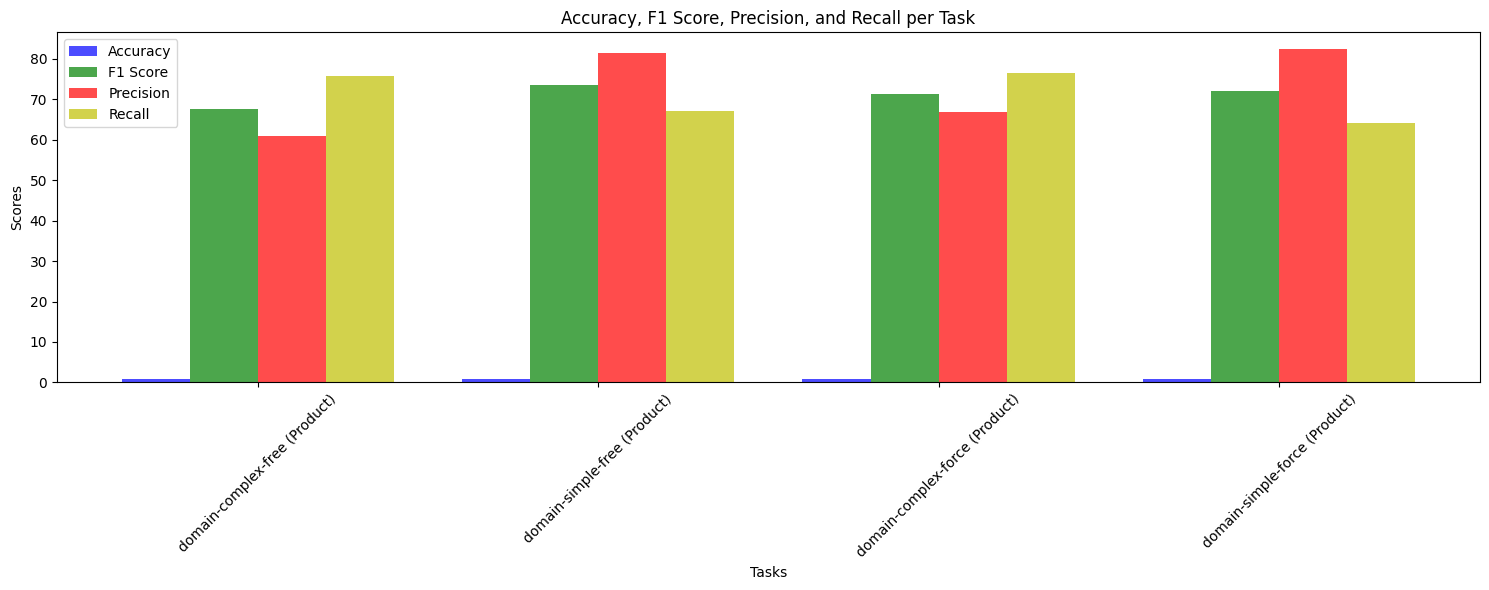

                             Task  Accuracy  F1 Score  Precision  Recall  \
2  domain-complex-force (Product)  0.862237     67.56      61.03   75.64   
0   domain-complex-free (Product)  0.908428     73.54      81.35   67.09   
3   domain-simple-force (Product)  0.883306     71.31      66.79   76.50   
1    domain-simple-free (Product)  0.905997     72.12      82.42   64.10   

   Num -1 Responses  
2                 0  
0                 0  
3                 0  
1                 0  
Mean of the scores:
F1 Score    71.1325
dtype: float64

Standard Deviation of the scores:
F1 Score    2.553786
dtype: float64


In [ ]:
analytics.draw_scores(amazon_google_13b_finetuned, prompt_order)

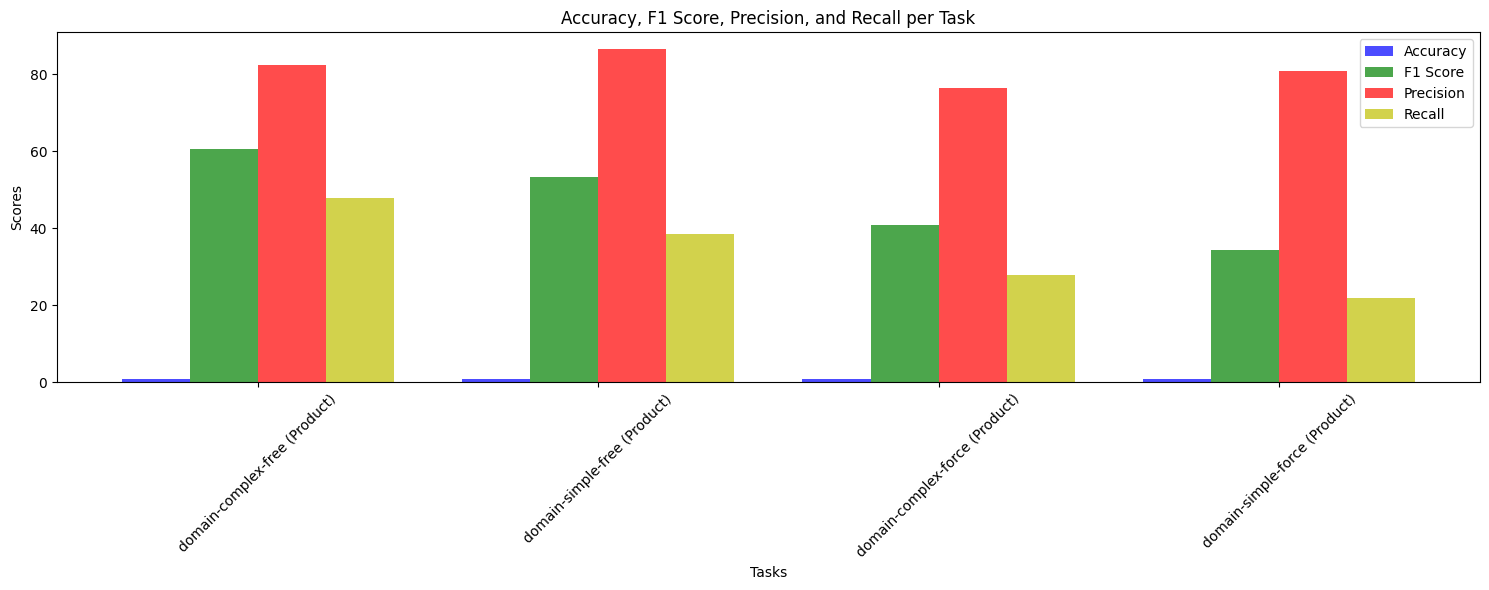

                             Task  Accuracy  F1 Score  Precision  Recall  \
2  domain-complex-force (Product)  0.881686     60.54      82.35   47.86   
0   domain-complex-free (Product)  0.871961     53.25      86.54   38.46   
3   domain-simple-force (Product)  0.846840     40.75      76.47   27.78   
1    domain-simple-free (Product)  0.841977     34.34      80.95   21.79   

   Num -1 Responses  
2                 0  
0                 0  
3                 0  
1                 0  
Mean of the scores:
F1 Score    47.22
dtype: float64

Standard Deviation of the scores:
F1 Score    11.853812
dtype: float64


In [ ]:
analytics.draw_scores(amazon_google_70b_finetuned, prompt_order)

In [ ]:
df_abt_buy_13k = pd.read_json("../data/abt-buy/2024-03-06 22:06:10.585578_13b_all.json")
analytics.draw_dataset_distrobution(df_abt_buy_13k, abt_buy_data_set)
analytics.draw_scores(df_abt_buy_13k)

FileNotFoundError: File ../data/abt-buy/2024-03-06 22:06:10.585578_13b_all.json does not exist

In [ ]:
df = pd.read_csv("../data/wdc/preprocessed_wdcproducts80cc20rnd000unsampled250_2_gs_testset_ralph.csv")
df

,id_left,brand_left,title_left,description_left,price_left,priceCurrency_left,specTableContent_left,cluster_id_left,id_right,brand_right,title_right,description_right,price_right,priceCurrency_right,specTableContent_right,cluster_id_right,pair_id,label,is_hard_negative
0,67017951,NaN,Ubiquiti UniFi Protect Video Security,Ubiquiti's UniFi Protect offers all the flexib...,NaN,NaN,NaN,1649038,5303451,NaN,Ubiquiti UniFi Video G3 Infrared Range Extender,The IR Range Extender is a 'Plug and Play' acc...,70.80,GBP,NaN,711907,67017951#5303451,0,True
1,41364196,NaN,Kšiltovka New Era Clean Trucker Chicago Bulls,NaN,658,CZK,NaN,46857262,29165749,NaN,Kšiltovka New Era New York Yankees MLB 9Fifty,NaN,810,CZK,NaN,76491423,41364196#29165749,0,True
2,49744056,NaN,DYMO D1 - Glossy tape - black on white - Roll ...,Dymo 2000/5500 Tape 19mmx7m Black/White 45803.,13.49,GBP,NaN,103304,66087579,DYMO,"DYMO 45017 D1 Tape 12mm x 7m sort p rd, S0720570",Originalt DYMO 45017 D1-tape SORT/RD Passer ti...,139.00,DKK,NaN,48435,49744056#66087579,0,True
3,63587638,Samsung,SAMSUNG T7 Touch Black 2TB Portable SSD with F...,"2TB Samsung T7 Touch MU-PC2T0K/WW, Portable Ex...",365.99,GBP,NaN,327893,52588862,NaN,T7 Portable SSD - 2TB Indigo Blue,"Light and pocket-sized, the Portable SSD T7 bo...",639.99,NZD,NaN,1252792,63587638#52588862,0,True
4,25138178,NaN,Kingston Canvas 128GB Micro SDXC C10 U1 V10 A1,NaN,39.95,USD,NaN,27477,45664586,NaN,Transcend SSD230S 128GB best price,"Transcend 128GB 2.5\"" SSD230S SATA3 3D NAND Fl...",2.208E1,eur,NaN,715391,25138178#45664586,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,16319132,NaN,Sigma 35mm f/1.4 DG HSM Art Lens Canon,67mm Filter Size f/1.4 Aperture N/A Stabilized...,699.00,USD,NaN,704991,54637257,NaN,SIGMA35mm/1.4 DG HSM | ART [Canon EF-mount]E67...,NaN,NaN,NaN,NaN,704991,16319132#54637257,1,False
1235,91699237,NaN,CM / CoolerMaster MasterCase H500 ARGB ATX Cas...,Warranty : N/A,159.00,SGD,NaN,1473407,13684723,NaN,Cooler Master Mastercase H500 ARGB Midi Tower ...,NaN,"114,95",EUR,NaN,1473407,91699237#13684723,1,False
1236,69931309,NaN,Corsair DDR4 8GB 2133Mhz CL15 Dimm Valueselect...,"Corsair Value Select 8GB PC4-17000, 8 GB, DDR4...",29.1,EUR,NaN,2861749,38788118,Corsair,CORSAIR DDR4 2133MHZ 8GB 1x288 DIMM 1.20V Unbu...,NaN,32.15,EUR,NaN,2861749,69931309#38788118,1,False
1237,92956854,Cooler Master,Cooler Master MasterBox Lite 5 ATX Case Window...,"Motherboard compatibility :ATX, Micro-ATX, Min...",85.0,AUD,NaN,1006147,42906184,NaN,CM Case MasterBox Lite 5,CM Case MasterBox Lite 5 Kucista,144.00,BAM,NaN,1006147,92956854#42906184,1,False


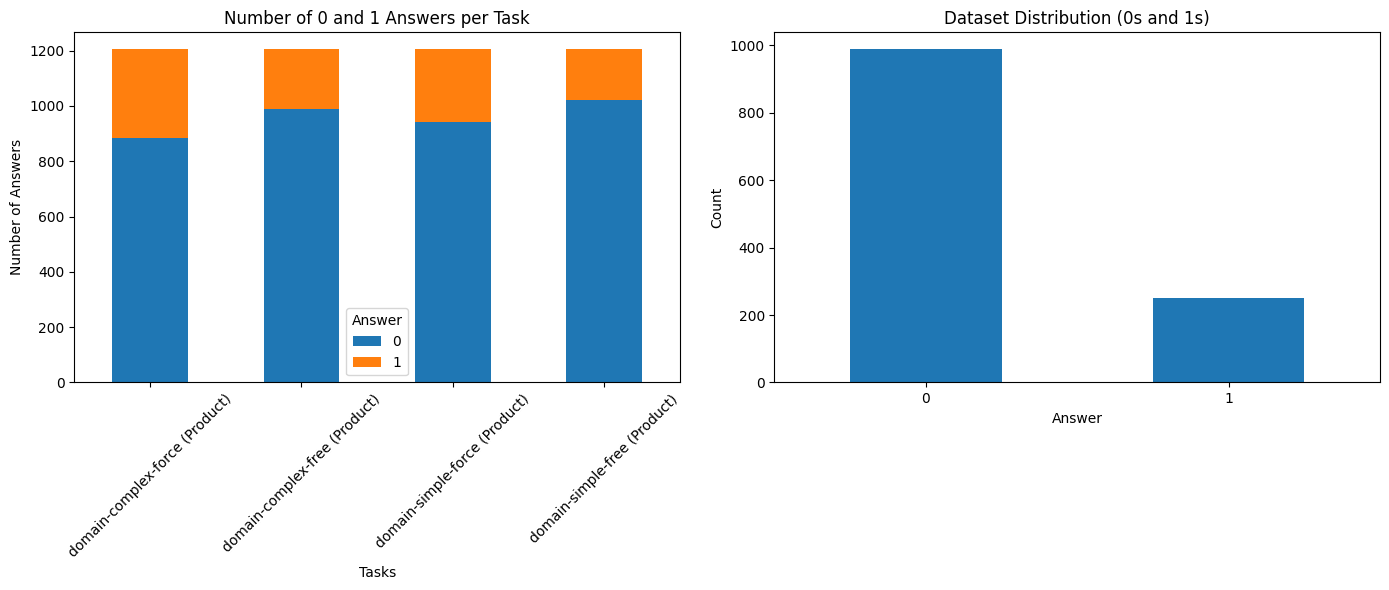

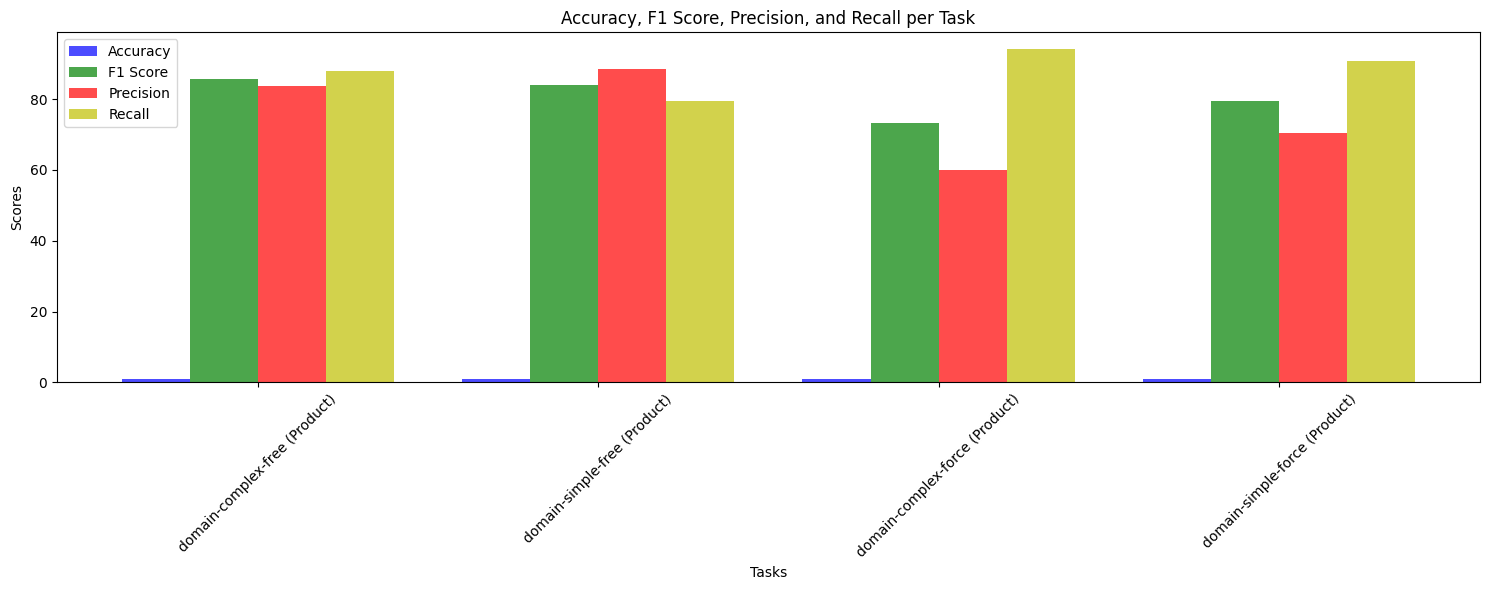

                             Task  Accuracy  F1 Score  Precision  Recall
0   domain-complex-free (Product)  0.950249     85.78      83.80   87.86
1    domain-simple-free (Product)  0.947761     83.89      88.65   79.61
2  domain-complex-force (Product)  0.883085     73.35      60.06   94.17
3   domain-simple-force (Product)  0.919569     79.41      70.57   90.78


In [ ]:
df_wdc_13k = pd.read_json("../results/13b/10_000/2024-03-06-02-08-07/2024-03-20-18-19-06_13b_domain_19k.json")
analytics.draw_dataset_distrobution(df_wdc_13k, wdc_dataset)
analytics.draw_scores(df_wdc_13k)

## Does fine-tuning transfer?

### wdc

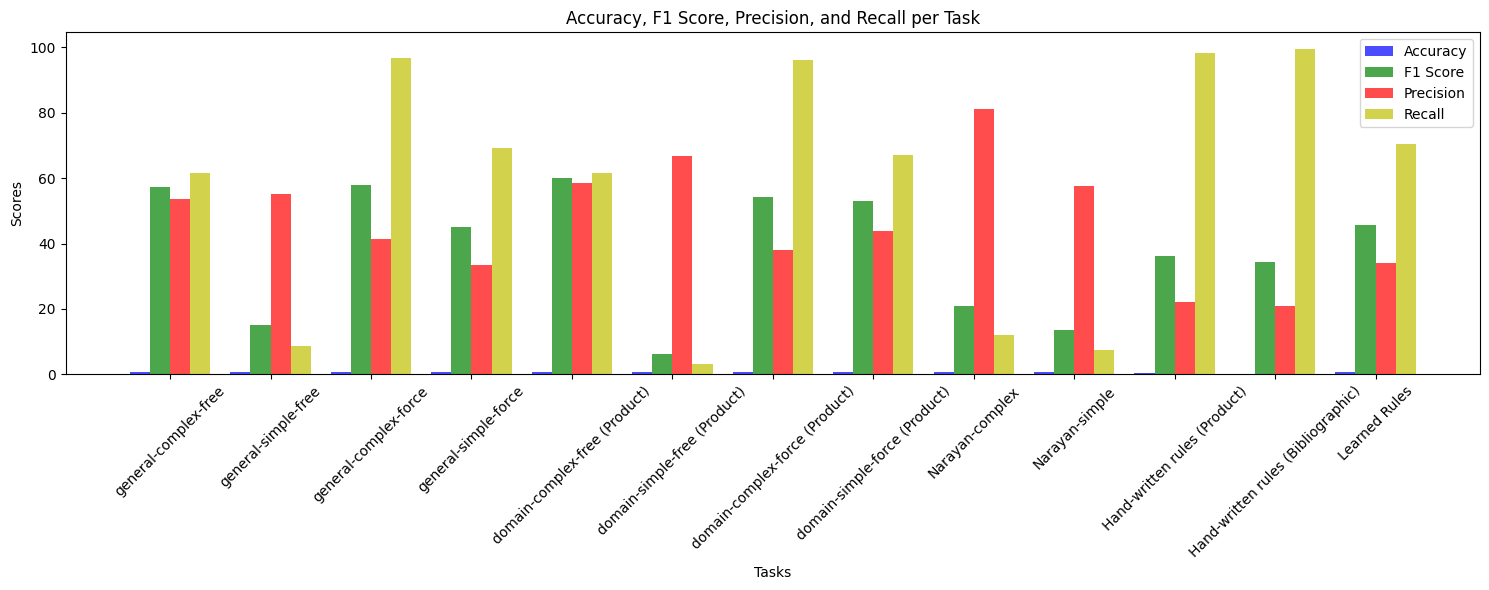

                                  Task  Accuracy  F1 Score  Precision  Recall
0                 general-complex-free  0.815174     57.36      53.66    61.6
1                  general-simple-free  0.801453     15.17      55.00     8.8
2                general-complex-force  0.716707     57.96      41.37    96.8
3                 general-simple-force  0.659403     45.05      33.40    69.2
4        domain-complex-free (Product)  0.834544     60.04      58.56    61.6
5         domain-simple-free (Product)  0.801453      6.11      66.67     3.2
6       domain-complex-force (Product)  0.674738     54.36      37.91    96.0
7        domain-simple-force (Product)  0.761098     53.16      43.98    67.2
8                      Narayan-complex  0.816788     20.91      81.08    12.0
9                       Narayan-simple  0.802260     13.43      57.58     7.6
10        Hand-written rules (Product)  0.303471     36.31      22.26    98.4
11  Hand-written rules (Bibliographic)  0.232446     34.37      

FileNotFoundError: File ../results/13b/complete/2024-03-12-20-13-53/2024-03-14-07-04-27_13b_domain_19k.json does not exist

In [ ]:
wdc_13b_baseline = pd.read_json("../results/lama-13b/2024-02-08 22:19:09.396702_13b_test.json")
#analytics.draw_dataset_distrobution(wdc_13b_baseline, abt_buy_data_set)
analytics.draw_scores(wdc_13b_baseline)

wdc_13b_finetuned = pd.read_json("../results/13b/complete/2024-03-12-20-13-53/2024-03-14-07-04-27_13b_domain_19k.json")
#analytics.draw_dataset_distrobution(wdc_13b_finetuned, abt_buy_data_set)
analytics.draw_scores(wdc_13b_finetuned)

### abt-buy

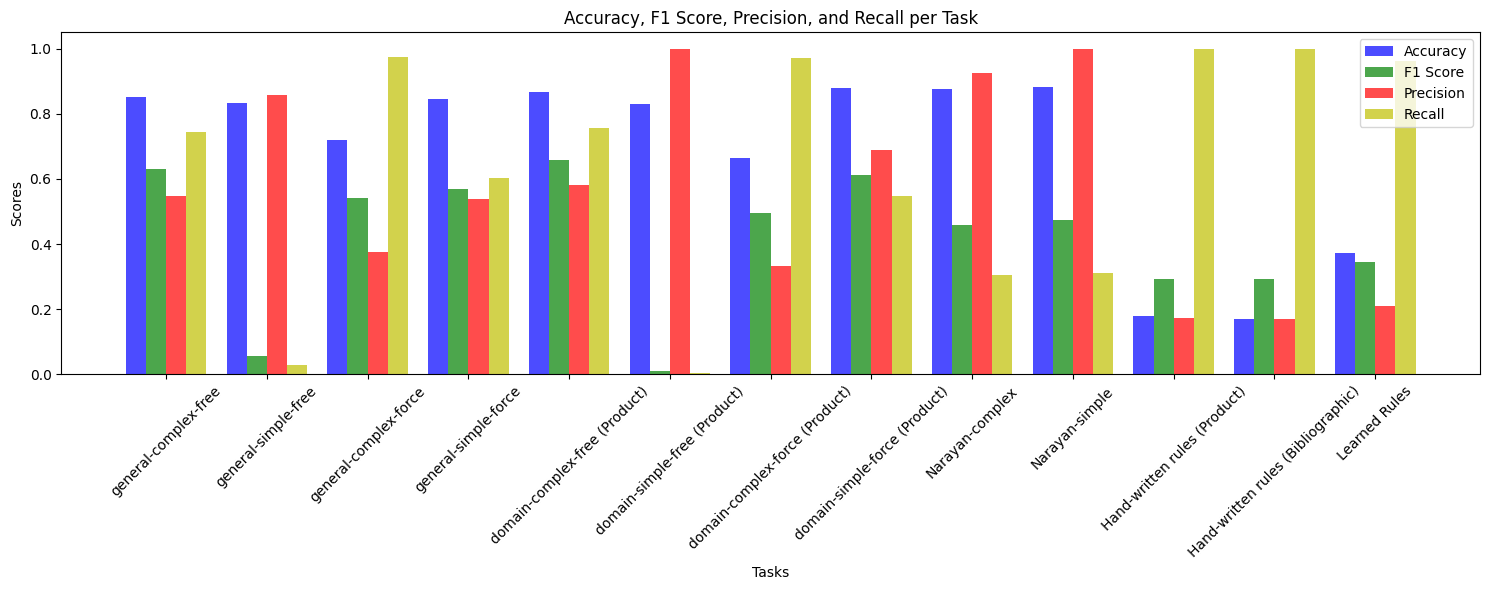

                                  Task  Accuracy  F1 Score  Precision  \
0                 general-complex-free  0.851575  0.630928   0.548387   
1                  general-simple-free  0.833333  0.056338   0.857143   
2                general-complex-force  0.718076  0.541779   0.375000   
3                 general-simple-force  0.844113  0.568807   0.539130   
4        domain-complex-free (Product)  0.865672  0.658228   0.582090   
5         domain-simple-free (Product)  0.830017  0.009662   1.000000   
6       domain-complex-force (Product)  0.664179  0.496894   0.333890   
7        domain-simple-force (Product)  0.880597  0.610811   0.689024   
8                      Narayan-complex  0.877280  0.459854   0.926471   
9                       Narayan-simple  0.882255  0.474074   1.000000   
10        Hand-written rules (Product)  0.179104  0.293866   0.172241   
11  Hand-written rules (Bibliographic)  0.170813  0.291785   0.170813   
12                       Learned Rules  0.373134  0

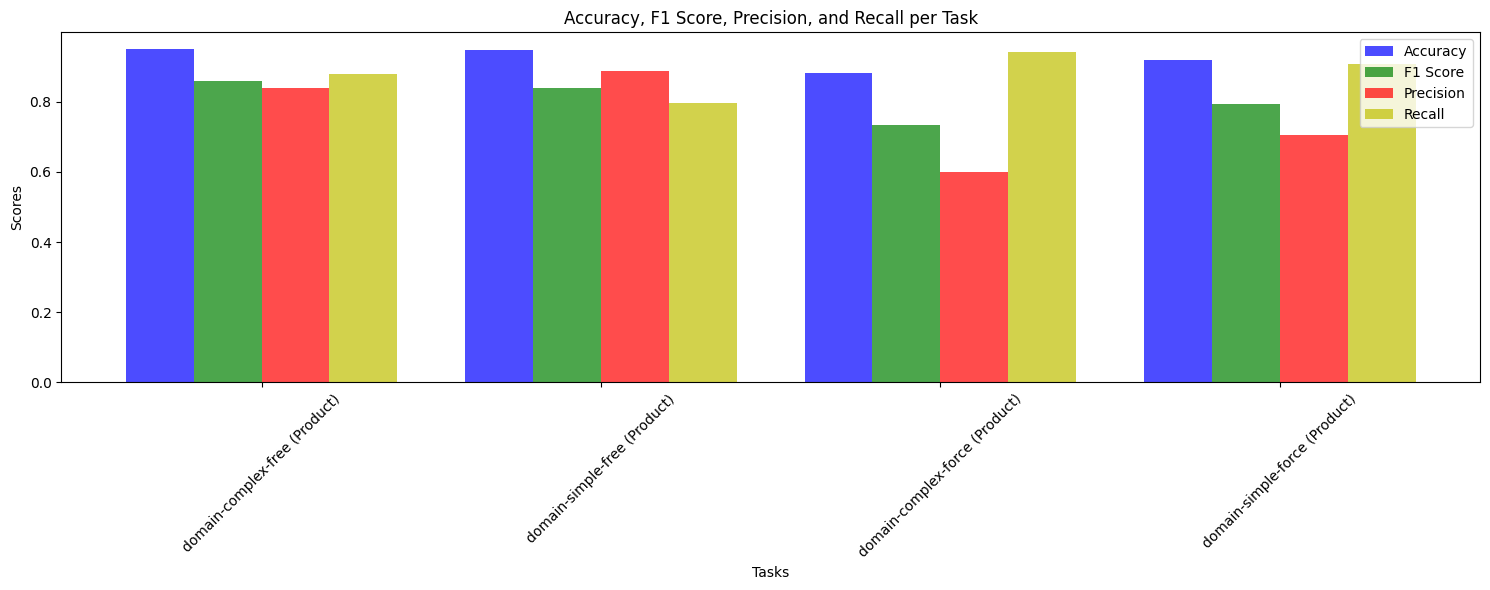

                             Task  Accuracy  F1 Score  Precision    Recall
0   domain-complex-free (Product)  0.950249  0.857820   0.837963  0.878641
1    domain-simple-free (Product)  0.947761  0.838875   0.886486  0.796117
2  domain-complex-force (Product)  0.883085  0.733459   0.600619  0.941748
3   domain-simple-force (Product)  0.919569  0.794055   0.705660  0.907767


In [ ]:
abt_buy_13b_baseline = pd.read_json("../results/baseline/abt-buy/2024-03-10 10:31:34.028854_13b_all.json")
abt_buy_13b_baseline.loc[abt_buy_13b_baseline['chatbot_response_clean'] == -1, 'chatbot_response_clean'] =0
#analytics.draw_dataset_distrobution(wdc_13b_baseline, abt_buy_data_set)
analytics.draw_scores(abt_buy_13b_baseline)

abt_buy_13b_finetuned = pd.read_json("../results/13b/complete/2024-03-12-20-13-53/abt-buy/2024-03-20-18-19-06_13b_domain_19k.json")
#analytics.draw_dataset_distrobution(wdc_13b_finetuned, abt_buy_data_set)
analytics.draw_scores(abt_buy_13b_finetuned)

### amazon-google

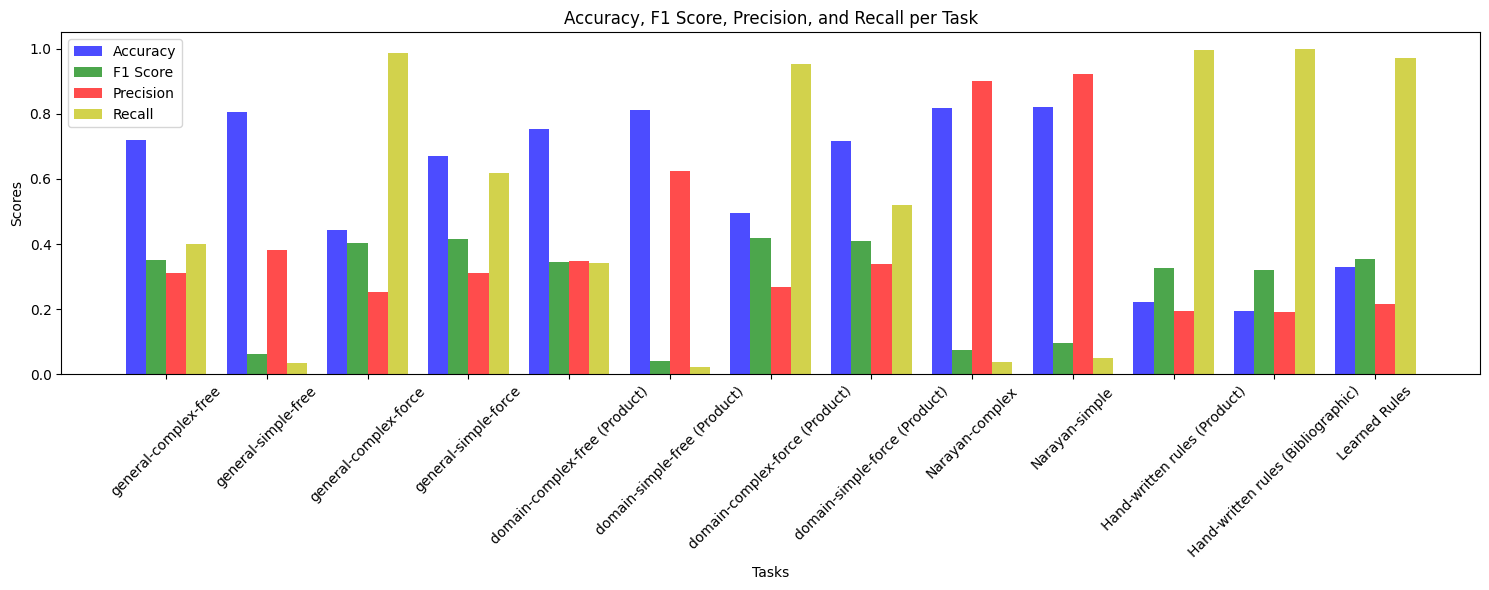

                                  Task  Accuracy  F1 Score  Precision  \
0                 general-complex-free  0.718801  0.351402   0.312292   
1                  general-simple-free  0.806321  0.062745   0.380952   
2                general-complex-force  0.444084  0.402439   0.252735   
3                 general-simple-force  0.669368  0.415473   0.312500   
4        domain-complex-free (Product)  0.753647  0.344828   0.347826   
5         domain-simple-free (Product)  0.811994  0.041322   0.625000   
6       domain-complex-force (Product)  0.496759  0.417994   0.267707   
7        domain-simple-force (Product)  0.716370  0.410774   0.338889   
8                      Narayan-complex  0.816856  0.073770   0.900000   
9                       Narayan-simple  0.819287  0.097166   0.923077   
10        Hand-written rules (Product)  0.222853  0.327018   0.195634   
11  Hand-written rules (Bibliographic)  0.193679  0.319891   0.190399   
12                       Learned Rules  0.329011  0

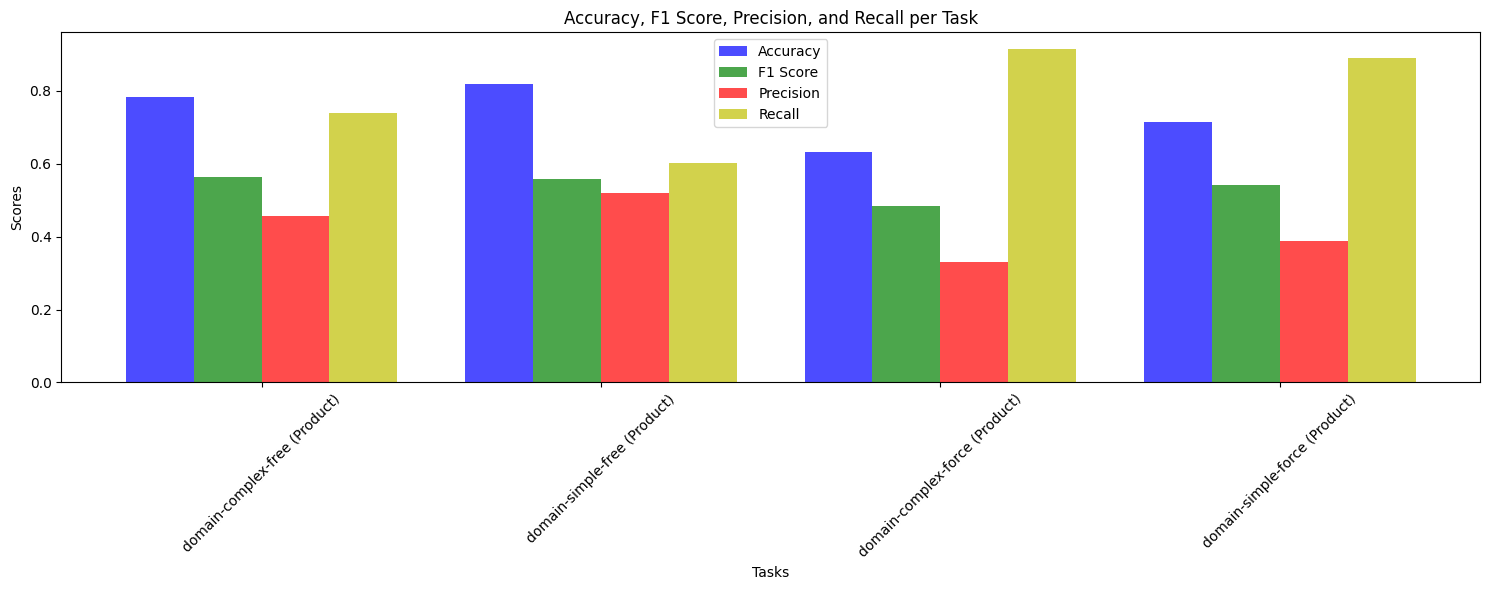

                             Task  Accuracy  F1 Score  Precision    Recall
0   domain-complex-free (Product)  0.782820  0.563518   0.455263  0.739316
1    domain-simple-free (Product)  0.818476  0.557312   0.518382  0.602564
2  domain-complex-force (Product)  0.632091  0.485261   0.330247  0.914530
3   domain-simple-force (Product)  0.713938  0.540962   0.388785  0.888889


In [ ]:
amazon_google_13b_baseline = pd.read_json("../results/baseline/amazon-google/2024-03-08 19:01:19.825925_13b_all.json")
amazon_google_13b_baseline.loc[amazon_google_13b_baseline['chatbot_response_clean'] == -1, 'chatbot_response_clean'] =0
#analytics.draw_dataset_distrobution(wdc_13b_baseline, abt_buy_data_set)
analytics.draw_scores(amazon_google_13b_baseline)

amazon_google_13b_finetuned = pd.read_json("../results/13b/complete/2024-03-12-20-13-53/amazon-google/2024-03-20-21-01-59_13b_domain_19k.json")

#analytics.draw_dataset_distrobution(wdc_13b_finetuned, abt_buy_data_set)
analytics.draw_scores(amazon_google_13b_finetuned)

## 70b

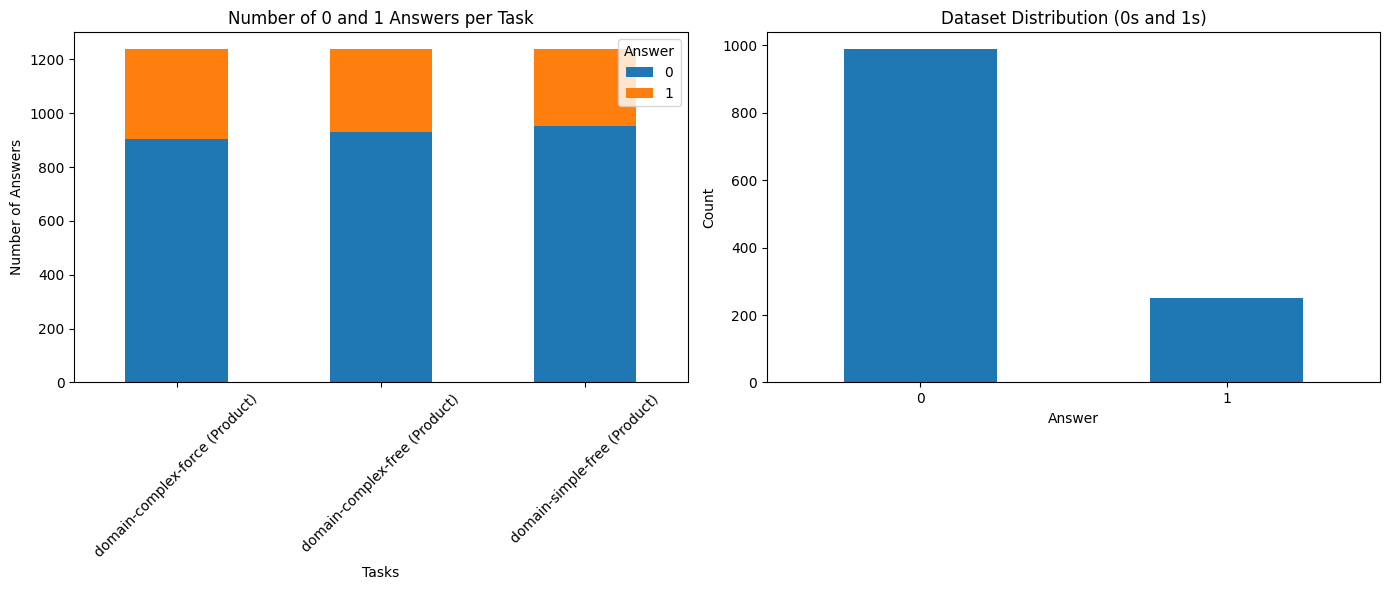

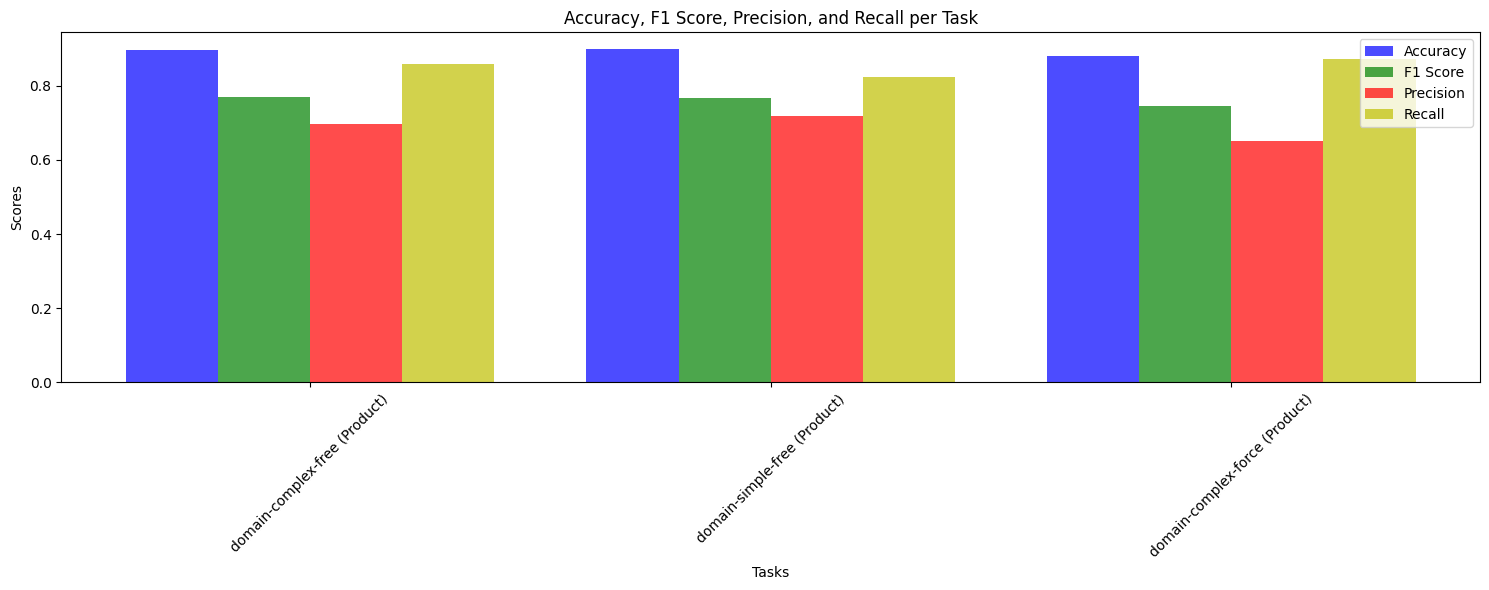

                             Task  Accuracy  F1 Score  Precision  Recall
0   domain-complex-free (Product)  0.896691  0.770609   0.698052   0.860
1    domain-simple-free (Product)  0.899112  0.767225   0.717770   0.824
2  domain-complex-force (Product)  0.879742  0.745299   0.650746   0.872


In [ ]:
df_70b_10k = pd.read_json("../results/70b/2024-03-09-11-44-18/2024-03-10-00-27-52_70b_domain_10k.json")
df_70b_10k.loc[df_70b_10k['chatbot_response_clean'] == -1, 'chatbot_response_clean'] =0
analytics.draw_dataset_distrobution(df_70b_10k, wdc_dataset)
analytics.draw_scores(df_70b_10k)

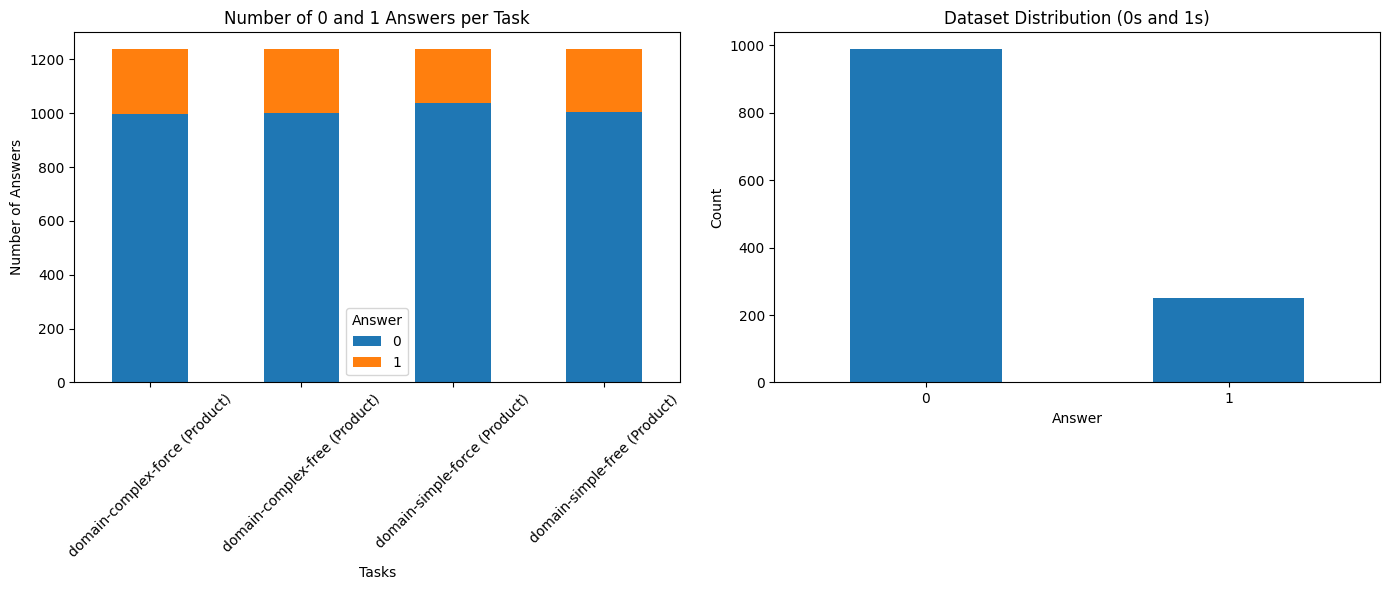

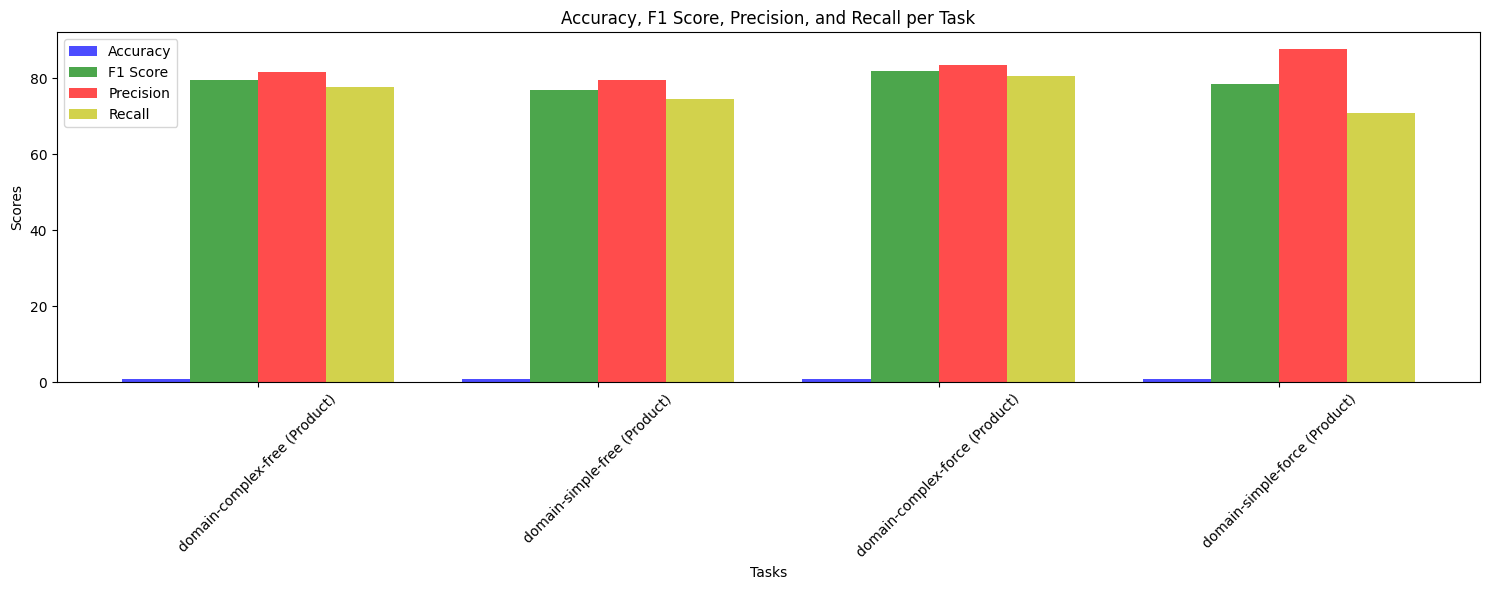

                             Task  Accuracy  F1 Score  Precision  Recall
0   domain-complex-free (Product)  0.919290     79.51      81.51    77.6
1    domain-simple-free (Product)  0.909605     76.86      79.49    74.4
2  domain-complex-force (Product)  0.928168     81.87      83.40    80.4
3   domain-simple-force (Product)  0.920904     78.32      87.62    70.8


In [ ]:
df_70b_13k = pd.read_json("../results/70b/10_000/2024-03-09-11-44-18/2024-03-10-10-22-48_70b_domain_13k.json")
df_70b_13k.loc[df_70b_13k['chatbot_response_clean'] == -1, 'chatbot_response_clean'] =0
analytics.draw_dataset_distrobution(df_70b_13k, wdc_dataset)
analytics.draw_scores(df_70b_13k)

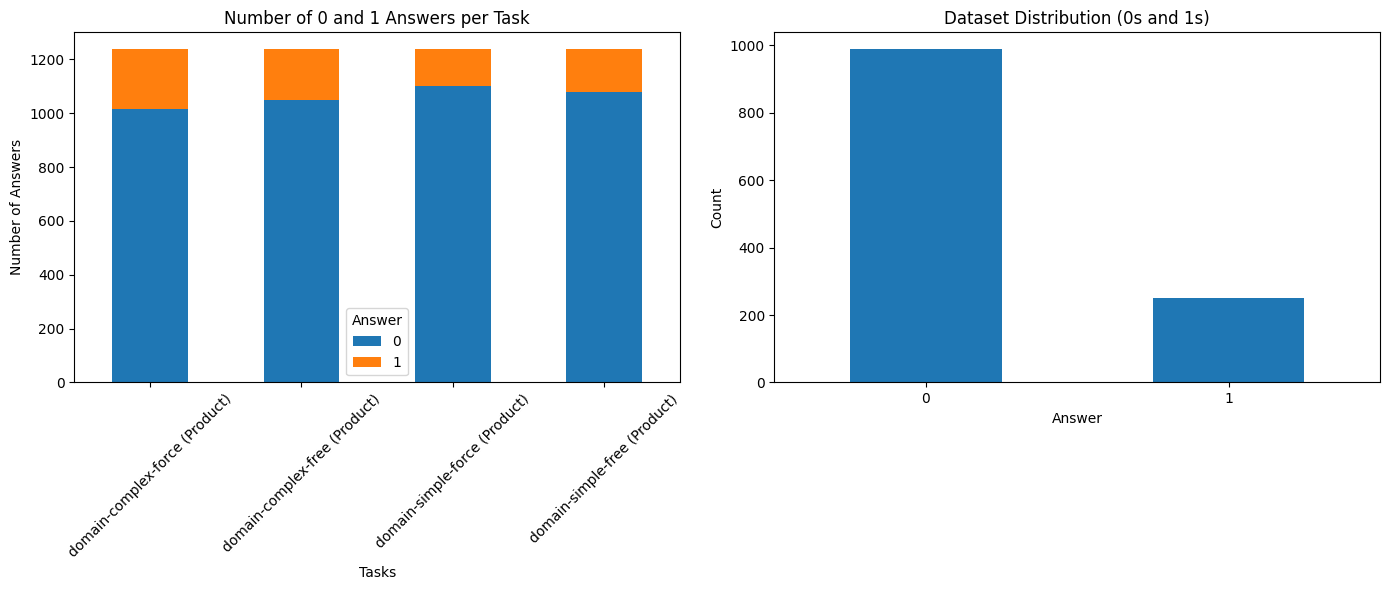

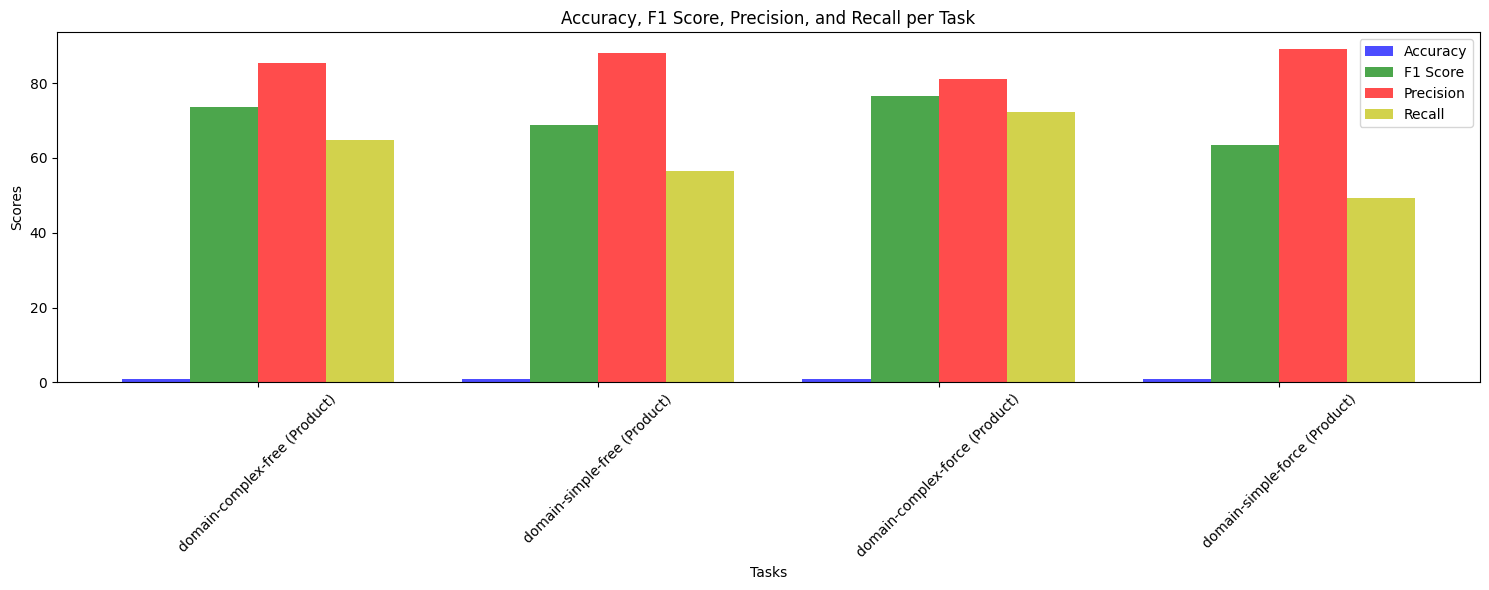

                             Task  Accuracy  F1 Score  Precision  Recall
0   domain-complex-free (Product)  0.906376     73.64      85.26    64.8
1    domain-simple-free (Product)  0.896691     68.78      88.12    56.4
2  domain-complex-force (Product)  0.910412     76.53      81.17    72.4
3   domain-simple-force (Product)  0.885391     63.40      89.13    49.2


In [ ]:
df_70b_18k = pd.read_json("../results/70b/10_000/2024-03-10-09-38-05/2024-03-11-03-18-29_70b_domain_18k.json")
df_70b_18k.loc[df_70b_18k['chatbot_response_clean'] == -1, 'chatbot_response_clean'] =0
analytics.draw_dataset_distrobution(df_70b_18k, wdc_dataset)
analytics.draw_scores(df_70b_18k)

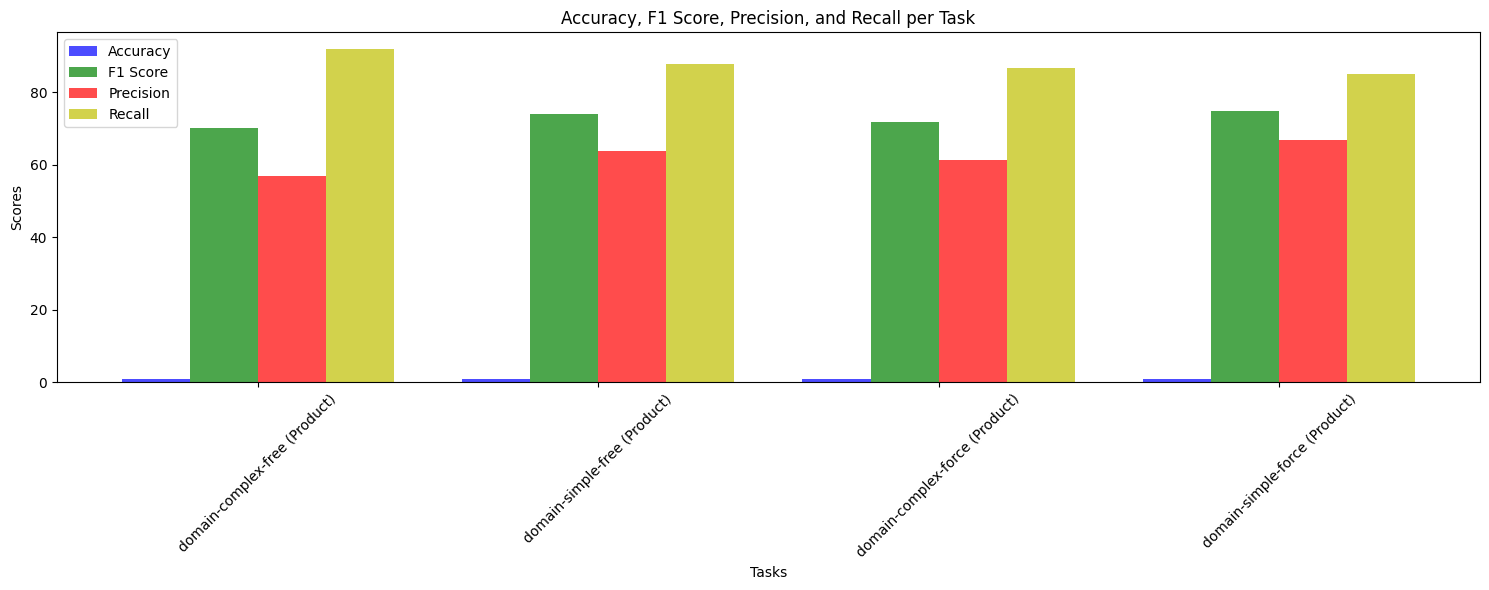

                             Task  Accuracy  F1 Score  Precision  Recall  \
2  domain-complex-force (Product)  0.843422     70.34      56.93    92.0   
0   domain-complex-free (Product)  0.875706     74.07      63.95    88.0   
3   domain-simple-force (Product)  0.863600     71.97      61.47    86.8   
1    domain-simple-free (Product)  0.884584     74.87      66.77    85.2   

   Num -1 Responses  
2                 0  
0                 0  
3                 0  
1                 0  
Mean of the scores:
F1 Score    72.8125
dtype: float64

Standard Deviation of the scores:
F1 Score    2.052452
dtype: float64


In [ ]:
df = pd.read_json("../prompts/wdc/2024-05-24-08-57-17_explanation_domain_0k.json")
df.loc[df['chatbot_response_clean'] == -1, 'chatbot_response_clean'] =0

analytics.draw_scores(df,prompt_order)